# Step 1: Creating Data Det

In [1]:
import pandas as pd
import json

# Initialize an empty list to store JSON objects
data_list_business = []

file_path_business = "yelp_academic_dataset_business.json"

try:
    with open(file_path_business, "r", encoding="utf-8") as json_file:
        for line in json_file:
            data = json.loads(line)
            data_list_business.append(data)

    # Convert the list of dictionaries into a DataFrame
    df_business = pd.DataFrame(data_list_business)

    # Now, 'df' is a pandas DataFrame containing your JSON data
except FileNotFoundError:
    print(f"File not found at path: {file_path_business}")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {str(e)}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [2]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [3]:
df_business.shape

(150346, 14)

In [4]:
import pandas as pd
from collections import defaultdict

# Initialize an empty default dictionary to store the count of business_id
business_counts = defaultdict(int)

file_path_review = "yelp_academic_dataset_review.json"

try:
    # Open the file
    with open(file_path_review, "r", encoding="utf-8") as file:
        for line in file:
            # Parse the JSON line and extract the business_id
            data = json.loads(line)
            business_id = data['business_id']

            # Update the count for this business_id
            business_counts[business_id] += 1

    # At this point, business_counts dictionary has the total counts across all chunks

    # Convert the dictionary to a DataFrame or Series if needed, for example:
    business_counts_series = pd.Series(business_counts).sort_values(ascending=False)

    # Now, business_counts_series is a Series with business_id as index and counts as values
except FileNotFoundError:
    print(f"File not found at path: {file_path_review}")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {str(e)}")
except Exception as e:
    print(f"An error occurred: {str(e)}")


In [5]:
import pandas as pd
import json
from collections import defaultdict

business_counts = defaultdict(int)
file_path_review = "yelp_academic_dataset_review.json"

try:
    with open(file_path_review, "r", encoding="utf-8") as file:
        for line in file:
            data = json.loads(line)
            business_id = data['business_id']
            business_counts[business_id] += 1
    business_counts_series = pd.Series(business_counts).sort_values(ascending=False)
except FileNotFoundError:
    print(f"File not found at path: {file_path_review}")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {str(e)}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [6]:
import pandas as pd
import json
from collections import defaultdict

# Step 1: Identifying businesses with more than 50 reviews
businesses_with_over_50_reviews = business_counts_series[(business_counts_series > 50)].index.tolist()

# Initialize a list to store chunks of reviews for businesses with over 50 reviews
reviews_for_selected_businesses = []

file_path_review = "yelp_academic_dataset_review.json"

try:
    with open(file_path_review, "r", encoding="utf-8") as file:
        # Temporary list to store reviews for the current chunk
        current_chunk = []
        chunk_size = 1000  # Adjust this size as needed

        for line in file:
            data = json.loads(line)

            # Check if the business_id of the current review is in the list of selected businesses
            if data['business_id'] in businesses_with_over_50_reviews:
                current_chunk.append(data)

                # If the current chunk reaches the chunk size, process it
                if len(current_chunk) >= chunk_size:
                    # Process the current chunk as needed
                    reviews_for_selected_businesses.append(current_chunk)
                    # Reset the current chunk
                    current_chunk = []

        # Don't forget to process the last chunk if it's not empty
        if current_chunk:
            reviews_for_selected_businesses.append(current_chunk)

except FileNotFoundError:
    print(f"File not found at path: {file_path_review}")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {str(e)}")
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [7]:
# Convert the last chunk to a DataFrame (as an example)
if reviews_for_selected_businesses:
    # Taking the last chunk as an example
    last_chunk = reviews_for_selected_businesses[-1]
    df = pd.DataFrame(last_chunk)

    # Now `df` is a pandas DataFrame containing the reviews from the last chunk
    print(df.head())  # Display the first few rows of the DataFrame

                review_id                 user_id             business_id  \
0  2lnuhnpkSS3CR0R9S57CFQ  nphSe9bPu0uapAGA_KC8ow  HGwI9OEWjdP0JU0wApZ3tA   
1  UYIEk5fbhVbjMXadhoBtyA  VN3apynnuv00bFwNOnXqqg  SOsjW1JARmtHUFtpFlp8rw   
2  zQXCf-ig90eRFkIfSYC2uw  Q2cW75ZwfVKPpOrVwAtMYg  9vP3RrHfPGqZW6V1QE0i0Q   
3  74ZyoSzZ9QnfcQMdladLdQ  mMtTHNOef-mTuqRouPJR2Q  y77Rf5aezhj92pi1juN93g   
4  ReFQiJb0mpXeAEAIXXHN3A  384sxlFjXXnSdKa1l0IxyQ  vXb4OWsjPoiBtmarfexj-g   

   stars  useful  funny  cool  \
0    1.0      13      0     0   
1    3.0       1      0     0   
2    1.0       0      0     0   
3    4.0       4      0     2   
4    2.0       0      1     0   

                                                text                 date  
0  Wedgewood Pharmacy acquired Diamondback Drugs....  2020-01-09 18:25:09  
1  I suppose these places aren't created equally....  2019-06-03 18:12:45  
2  BEWARE when you sign up to look at the process...  2015-11-02 17:29:14  
3  I have been seeing this place a

In [8]:
all_reviews_df = pd.DataFrame()  # Initialize an empty DataFrame

for chunk in reviews_for_selected_businesses:
    # Convert each chunk to a DataFrame
    chunk_df = pd.DataFrame(chunk)
    # Concatenate the current chunk DataFrame to the all_reviews_df DataFrame
    all_reviews_df = pd.concat([all_reviews_df, chunk_df], ignore_index=True)

# Now `all_reviews_df` contains all reviews across all chunks as a single DataFrame
print(all_reviews_df.head())  # Display the first few rows of the DataFrame

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
3  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
4  6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   

   stars  useful  funny  cool  \
0    3.0       0      0     0   
1    5.0       1      0     1   
2    5.0       1      0     1   
3    1.0       1      2     1   
4    5.0       0      2     0   

                                                text                 date  
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18  
2  Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 00:01:03  
3  I am a long term frequent custo

In [9]:
all_reviews_df.shape

(5088251, 9)

In [10]:
all_reviews_df.business_id.value_counts()

business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
                          ... 
7FrYR38CtgWvncBgmSko8w      51
7YJCYwLMtCOwI0X9-cUuMQ      51
HG0Djdv_hQwFeE_-R2XFaA      51
c3Um9kXZHETJ1odf8rZSRg      51
v46bhiJ2EIu3IuJlSMp9UQ      51
Name: count, Length: 29667, dtype: int64

In [11]:
# Merging df_review and df_business on 'business_id'
df_merged = pd.merge(all_reviews_df, df_business, on='business_id', how='left', suffixes=('_review', '_business'))

# Display the first few rows of the merged dataframe to verify the merge
print(df_merged.head())

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
3  JrIxlS1TzJ-iCu79ul40cQ  eUta8W_HdHMXPzLBBZhL1A  04UD14gamNjLY0IDYVhHJg   
4  6AxgBCNX_PNTOxmbRSwcKQ  r3zeYsv1XFBRA4dJpL78cw  gmjsEdUsKpj9Xxu6pdjH0g   

   stars_review  useful  funny  cool  \
0           3.0       0      0     0   
1           5.0       1      0     1   
2           5.0       1      0     1   
3           1.0       1      2     1   
4           5.0       0      2     0   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18   
2  Wow!  Yummy, different,  delicious.   Our favo...  2015-01-04 

In [12]:
# Filtering out non-restaurant related categories
df_merged.categories.value_counts()

categories
Mexican, Restaurants                                                                       46852
Restaurants, Mexican                                                                       46206
Restaurants, Italian                                                                       24101
Italian, Restaurants                                                                       22843
Restaurants, Pizza                                                                         19645
                                                                                           ...  
Restaurants, Food Delivery Services, Fast Food, Sandwiches, Food, Delis, Specialty Food       51
Burgers, American (Traditional), Restaurants, American (New)                                  51
Food, Restaurants, Cafes, Coffee & Tea, Donuts                                                51
ATV Rentals/Tours, Hotels & Travel, Tours, Fishing, Active Life, Boating                      51
Automotive, Body Sh

In [13]:
# create a mask for restaurants
mask_restaurants = df_merged['categories'].str.contains('Restaurants')

# create a mask for food
mask_food = df_merged['categories'].str.contains('Food')

# apply both masks
restaurants_and_food = df_merged[mask_restaurants & mask_food]

# number of businesses that have food and restaurant in their category
restaurants_and_food['categories'].count()

1418534

In [14]:
df_merged.state.value_counts()

state
PA    1167559
FL     830831
LA     641622
TN     459806
MO     364974
IN     346586
NV     333845
AZ     302725
CA     284640
NJ     150537
ID     100095
DE      40987
AB      39173
IL      24871
Name: count, dtype: int64

In [15]:
# Assuming df_business is already defined and contains business information
midwest_states = ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'MO', 'NE', 'ND', 'OH', 'SD', 'WI']

# Assuming df_merged is your DataFrame and it has a column named 'state'
df_merged = df_merged[df_merged['state'].isin(midwest_states)]

In [16]:
df_merged.columns

Index(['review_id', 'user_id', 'business_id', 'stars_review', 'useful',
       'funny', 'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_business',
       'review_count', 'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [17]:
df_merged.shape

(736431, 22)

In [18]:
df_merged.business_id.value_counts()

business_id
I_3LMZ_1m2mzR0oLIOePIg    4093
UFCN0bYdHroPKu6KV5CJqg    2312
iRIHK8-EwpeffwvoO4nzIA    2170
ReV4Q3rEJ8neicQPc6pC0w    2079
2BMk_drsikKWslJCXmQtjQ    2023
                          ... 
A0_0o7UtaFUPC_zEFRpMcQ      51
PnYBj3G4T44cqb5KEZgfaw      51
ogTqRH-9yoLK44eOzlYZ4g      51
PwPn7jOoefHmWyeeuu4l5w      51
H-9pSo9qoBRC_ZtsNTwOKg      51
Name: count, Length: 4706, dtype: int64

In [19]:
df_merged = df_merged.loc[df_merged['business_id'] != 'I_3LMZ_1m2mzR0oLIOePIg']

In [20]:
df_merged.business_id.value_counts()

business_id
UFCN0bYdHroPKu6KV5CJqg    2312
iRIHK8-EwpeffwvoO4nzIA    2170
ReV4Q3rEJ8neicQPc6pC0w    2079
2BMk_drsikKWslJCXmQtjQ    2023
R8t9g5nvi7VFyS8zsgmj8Q    1788
                          ... 
WLC8eW96Nm8a23nROVa7cQ      51
3eJlEkRmcJODPMOp-cJkcA      51
6ns2Tg3bfkrj53b8tuu5TQ      51
fPIEWoLZE5pjKhg43Mm8MQ      51
p3Vbzk03kNiI0tr181qamA      51
Name: count, Length: 4705, dtype: int64

In [21]:
df_merged.state.value_counts()

state
MO    360881
IN    346586
IL     24871
Name: count, dtype: int64

In [22]:
df_merged.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_business,review_count,is_open,attributes,categories,hours
7,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,Milktooth,...,IN,46203,39.759169,-86.146494,4.0,1379,1,"{'GoodForKids': 'True', 'Alcohol': 'u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',..."
8,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,Brio Italian Grille,...,MO,63131,38.632494,-90.406444,3.5,366,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
13,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,1,0,0,The hubby and I have been here on multiple occ...,2014-08-10 19:41:43,Olio,...,MO,63110,38.619543,-90.255805,4.0,398,1,"{'RestaurantsReservations': 'False', 'WiFi': '...","Wine Bars, Bars, Nightlife, American (New), Me...","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
16,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5.0,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13 19:49:51,Ted Drewes,...,MO,63109,38.589429,-90.307640,4.5,1395,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Ice Cream & Frozen Yogurt, Food, Local Flavor,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:30',..."
17,ZVvhc3Go7v5I8XTiVoWmqQ,WBpQDAZymU0dhIqXcACGNw,ut6fi2W2YaipNOqvi7e0jw,3.0,0,0,0,"Upland is a brewery based out of Bloomington, ...",2014-11-12 14:12:20,Upland Carmel Tap House,...,IN,46032,39.956925,-86.142974,4.0,244,1,"{'BikeParking': 'True', 'Alcohol': ''beer_and_...","Nightlife, Food, Bars, Breweries, Pizza, Brewp...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [23]:
df_merged.to_csv("df_merged.csv", index=False)

### Merged Data Set contains reviwes about:
- 568,842 business reviwes
- 2,340 business with over 100 reviews per business
- 3 Midwest states

# Step 2: Exploring Data

In [1]:
import pandas as pd

# Load the data
file_path = 'df_merged.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
df.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,...,state,postal_code,latitude,longitude,stars_business,review_count,is_open,attributes,categories,hours
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,Milktooth,...,IN,46203.0,39.759169,-86.146494,4.0,1379,1,"{'GoodForKids': 'True', 'Alcohol': ""u'full_bar...","Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',..."
1,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27 22:44:01,Brio Italian Grille,...,MO,63131.0,38.632494,-90.406444,3.5,366,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Bars, Pizza, Nightlife, Cocktail Bars, Italian...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."
2,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,1,0,0,The hubby and I have been here on multiple occ...,2014-08-10 19:41:43,Olio,...,MO,63110.0,38.619543,-90.255805,4.0,398,1,"{'RestaurantsReservations': 'False', 'WiFi': ""...","Wine Bars, Bars, Nightlife, American (New), Me...","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5.0,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13 19:49:51,Ted Drewes,...,MO,63109.0,38.589429,-90.307640,4.5,1395,1,"{'RestaurantsPriceRange2': '1', 'BikeParking':...","Ice Cream & Frozen Yogurt, Food, Local Flavor,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:30',..."
4,ZVvhc3Go7v5I8XTiVoWmqQ,WBpQDAZymU0dhIqXcACGNw,ut6fi2W2YaipNOqvi7e0jw,3.0,0,0,0,"Upland is a brewery based out of Bloomington, ...",2014-11-12 14:12:20,Upland Carmel Tap House,...,IN,46032.0,39.956925,-86.142974,4.0,244,1,"{'BikeParking': 'True', 'Alcohol': ""'beer_and_...","Nightlife, Food, Bars, Breweries, Pizza, Brewp...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ..."


In [2]:
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
review_id             0
user_id               0
business_id           0
stars_review          0
useful                0
funny                 0
cool                  0
text                  0
date                  0
name                  0
address            1714
city                  0
state                 0
postal_code          79
latitude              0
longitude             0
stars_business        0
review_count          0
is_open               0
attributes         4934
categories            0
hours             14306
dtype: int64


In [3]:
df= df.dropna()

In [4]:
df = df.drop_duplicates()
df.shape

(713147, 22)

In [5]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'])

# Extract required information and create new columns

df['Day_of_Week'] = df['date'].dt.strftime('%A')
df['Month'] = df['date'].dt.strftime('%B')
df['Year'] = df['date'].dt.strftime('%Y')

# Categorize time of day
def categorize_time(hour):
    if 7 <= hour < 11:
        return 'Morning'
    elif 11 <= hour < 15:
        return 'Lunch'
    elif 15 <= hour < 19:
        return 'Dinner'
    elif 19 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'

df['Time_of_Day'] = df['date'].dt.hour.apply(categorize_time)
df['date'] = df['date'].dt.strftime('%d-%m-%Y')
print(df)

                     review_id                 user_id  \
0       l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A   
1       XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg   
2       LnGZB0fjfgeVDVz5IHuEVA  j2wlzrntrbKwyOcOiB3l3w   
3       vBK79c3_1Ff_oqkh5VpfGg  Ohhrhu1RkqfVciIVx_W5HQ   
4       ZVvhc3Go7v5I8XTiVoWmqQ  WBpQDAZymU0dhIqXcACGNw   
...                        ...                     ...   
732333  flql0FgydC3n0Hwx6kcJoQ  V3XYG1zKuW8VUBNtjacoxA   
732334  ND5Oq45jqd_dSbBD6i73kw  ezqvnYDS8WD2KshapwQ3Yw   
732335  A1Lv5xmgj2jPDIa2bF1byg  UfevNSM_H14XXWZFlHYPoA   
732336  7NgXAuTFiJHYbuepOPwU0w  x1QLCwZGFAjxRRw4EHc3-g   
732337  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                   business_id  stars_review  useful  funny  cool  \
0       EQ-TZ2eeD_E0BHuvoaeG5Q           4.0       0      0     0   
1       lj-E32x9_FA7GmUrBGBEWg           4.0       0      0     0   
2       rBdG_23USc7DletfZ11xGA           4.0       1      0     0   
3       nRKndeZLQ3eDL10UMwS

In [6]:
df.dtypes

review_id          object
user_id            object
business_id        object
stars_review      float64
useful              int64
funny               int64
cool                int64
text               object
date               object
name               object
address            object
city               object
state              object
postal_code       float64
latitude          float64
longitude         float64
stars_business    float64
review_count        int64
is_open             int64
attributes         object
categories         object
hours              object
Day_of_Week        object
Month              object
Year               object
Time_of_Day        object
dtype: object

In [7]:
import warnings
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
warnings.filterwarnings("ignore")

# Convert 'Year' to number
df['Year'] = df['Year'].astype(int)

# Convert all ID columns to objects
id_columns = ['review_id', 'user_id', 'business_id']
df[id_columns] = df[id_columns].astype(str)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Time_of_Day'] = label_encoder.fit_transform(df['Time_of_Day'])
df['Month'] = label_encoder.fit_transform(df['Month'])
df['Day_of_Week'] = label_encoder.fit_transform(df['Day_of_Week'])

print(df)

                     review_id                 user_id  \
0       l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A   
1       XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg   
2       LnGZB0fjfgeVDVz5IHuEVA  j2wlzrntrbKwyOcOiB3l3w   
3       vBK79c3_1Ff_oqkh5VpfGg  Ohhrhu1RkqfVciIVx_W5HQ   
4       ZVvhc3Go7v5I8XTiVoWmqQ  WBpQDAZymU0dhIqXcACGNw   
...                        ...                     ...   
732333  flql0FgydC3n0Hwx6kcJoQ  V3XYG1zKuW8VUBNtjacoxA   
732334  ND5Oq45jqd_dSbBD6i73kw  ezqvnYDS8WD2KshapwQ3Yw   
732335  A1Lv5xmgj2jPDIa2bF1byg  UfevNSM_H14XXWZFlHYPoA   
732336  7NgXAuTFiJHYbuepOPwU0w  x1QLCwZGFAjxRRw4EHc3-g   
732337  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                   business_id  stars_review  useful  funny  cool  \
0       EQ-TZ2eeD_E0BHuvoaeG5Q           4.0       0      0     0   
1       lj-E32x9_FA7GmUrBGBEWg           4.0       0      0     0   
2       rBdG_23USc7DletfZ11xGA           4.0       1      0     0   
3       nRKndeZLQ3eDL10UMwS

In [8]:
df.dtypes

review_id          object
user_id            object
business_id        object
stars_review      float64
useful              int64
funny               int64
cool                int64
text               object
date               object
name               object
address            object
city               object
state              object
postal_code       float64
latitude          float64
longitude         float64
stars_business    float64
review_count        int64
is_open             int64
attributes         object
categories         object
hours              object
Day_of_Week         int64
Month               int64
Year                int64
Time_of_Day         int64
dtype: object

In [9]:
percentile_useful = df['useful'].quantile(0.7)
percentile_funny = df['funny'].quantile(0.7)
percentile_cool = df['cool'].quantile(0.7)

# Create a mask for users above the 30th percentile in all three columns
mask = (df['useful'] > percentile_useful) & (df['funny'] > percentile_funny) & (df['cool'] > percentile_cool)

# Create a new column indicating whether the user is a "top user"
df['top_user'] = 0
df.loc[mask, 'top_user'] = 1

# Count the number of "Yes" and "No"
count_yes_no = df['top_user'].value_counts()

print("Count of 'Yes':", count_yes_no[1])
print("Count of 'No':", count_yes_no[0])

Count of 'Yes': 42588
Count of 'No': 670559


In [10]:
unique_users = df.drop_duplicates(subset='user_id')
user_counts = unique_users['top_user'].value_counts()
print("Count of 'No' and 'Yes' for each unique user ID:")
print(user_counts)

Count of 'No' and 'Yes' for each unique user ID:
top_user
0    210398
1      4986
Name: count, dtype: int64


In [11]:
df.dtypes

review_id          object
user_id            object
business_id        object
stars_review      float64
useful              int64
funny               int64
cool                int64
text               object
date               object
name               object
address            object
city               object
state              object
postal_code       float64
latitude          float64
longitude         float64
stars_business    float64
review_count        int64
is_open             int64
attributes         object
categories         object
hours              object
Day_of_Week         int64
Month               int64
Year                int64
Time_of_Day         int64
top_user            int64
dtype: object

In [12]:
# Filter the DataFrame to include only reviews made by top users
top_user_reviews = df[df['top_user'] == 1]

# Group by 'business_id' and count the number of reviews per business
reviews_count_per_business = df.groupby('business_id').size()

# Group by 'business_id' and count the number of reviews made by top users per business
top_user_reviews_per_business = top_user_reviews.groupby('business_id').size()

# Calculate the percentage of reviews made by top users for each business
percentage_top_user_reviews = (top_user_reviews_per_business / reviews_count_per_business) * 100

# Merge the percentage back to the original DataFrame
df = pd.merge(df, percentage_top_user_reviews.rename('top_user_reviews'), how='left', on='business_id')

# Fill NaN values with 0 (for businesses with no reviews by top users)
df['top_user_reviews'] = df['top_user_reviews'].fillna(0)

print(df)
# top_user_reviews is percentage per restaurant from total reviews how many are written by top users

                     review_id                 user_id  \
0       l3Wk_mvAog6XANIuGQ9C7Q  ZbqSHbgCjzVAqaa7NKWn5A   
1       XW_LfMv0fV21l9c6xQd_lw  9OAtfnWag-ajVxRbUTGIyg   
2       LnGZB0fjfgeVDVz5IHuEVA  j2wlzrntrbKwyOcOiB3l3w   
3       vBK79c3_1Ff_oqkh5VpfGg  Ohhrhu1RkqfVciIVx_W5HQ   
4       ZVvhc3Go7v5I8XTiVoWmqQ  WBpQDAZymU0dhIqXcACGNw   
...                        ...                     ...   
713142  flql0FgydC3n0Hwx6kcJoQ  V3XYG1zKuW8VUBNtjacoxA   
713143  ND5Oq45jqd_dSbBD6i73kw  ezqvnYDS8WD2KshapwQ3Yw   
713144  A1Lv5xmgj2jPDIa2bF1byg  UfevNSM_H14XXWZFlHYPoA   
713145  7NgXAuTFiJHYbuepOPwU0w  x1QLCwZGFAjxRRw4EHc3-g   
713146  i-I4ZOhoX70Nw5H0FwrQUA  YwAMC-jvZ1fvEUum6QkEkw   

                   business_id  stars_review  useful  funny  cool  \
0       EQ-TZ2eeD_E0BHuvoaeG5Q           4.0       0      0     0   
1       lj-E32x9_FA7GmUrBGBEWg           4.0       0      0     0   
2       rBdG_23USc7DletfZ11xGA           4.0       1      0     0   
3       nRKndeZLQ3eDL10UMwS

In [13]:
df.drop(columns='top_user', inplace=True)

In [14]:
df['top_user_reviews'] = df['top_user_reviews'].round(2)

# Step 3: Pre-processing Dataset

In [15]:
#!pip install seaborn

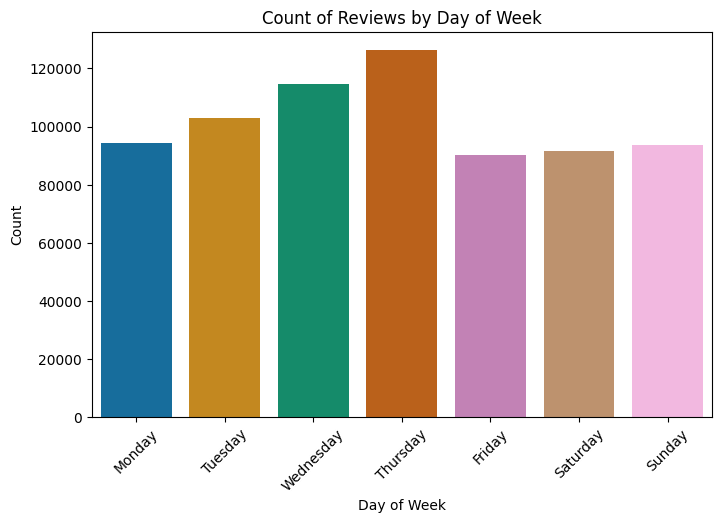

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'Day_of_Week' is a column in it

# Define a dictionary to map encoded Day_of_Week to actual strings
day_of_week_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Replace encoded values with actual strings
df['Day_of_Week_str'] = df['Day_of_Week'].map(day_of_week_mapping)

# Countplot for Day of Week with actual strings using a colorblind-friendly palette
plt.figure(figsize=(8, 5))
sns.countplot(x='Day_of_Week_str', data=df, palette="colorblind", order=day_of_week_mapping.values())
plt.title('Count of Reviews by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

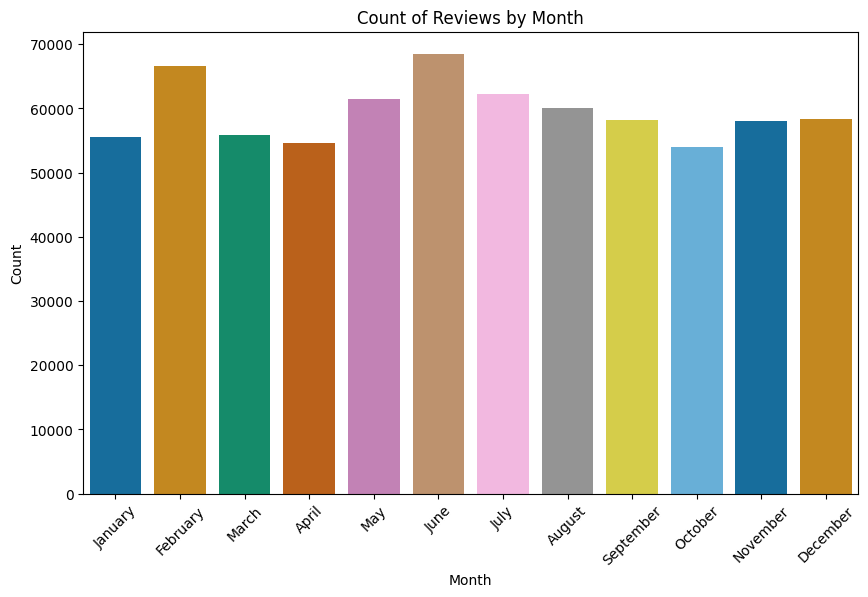

In [17]:
# Define a dictionary to map encoded Month to actual strings
month_mapping = {0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December'}

# Replace encoded values with actual strings
df['Month_str'] = df['Month'].map(month_mapping)

# Countplot for Month with actual strings
plt.figure(figsize=(10, 6))
sns.countplot(x='Month_str', data=df, palette="colorblind", order=month_mapping.values())
plt.title('Count of Reviews by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

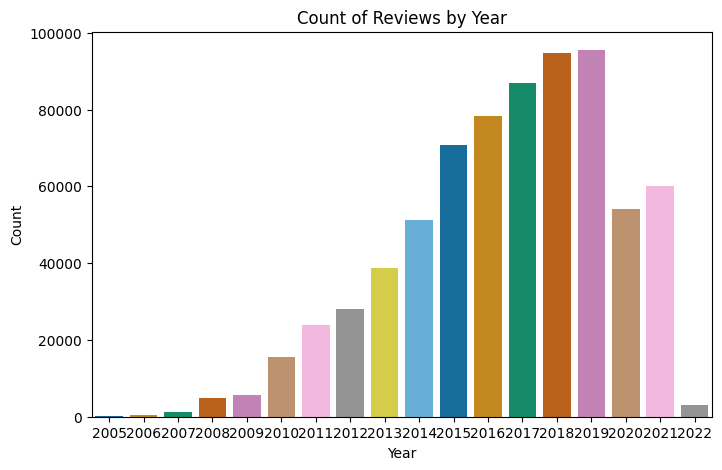

In [18]:
# Countplot for Year
plt.figure(figsize=(8, 5))
sns.countplot(x='Year', palette="colorblind", data=df)
plt.title('Count of Reviews by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

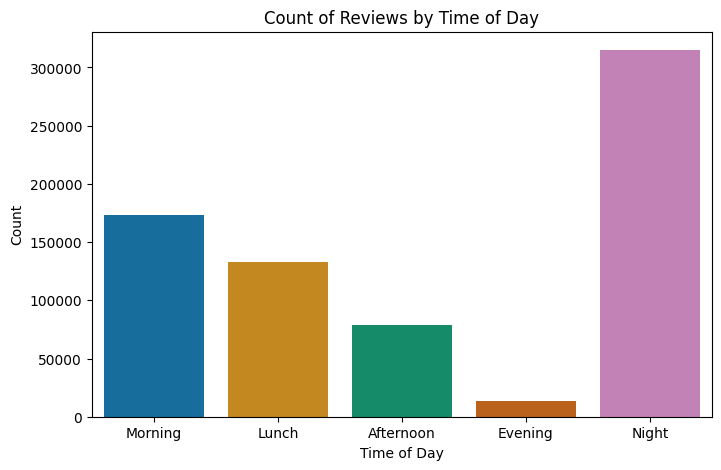

In [19]:
# Define a dictionary to map encoded Time_of_Day to actual strings
time_of_day_mapping = {0: 'Morning', 1: 'Lunch', 2: 'Afternoon', 3: 'Evening', 4: 'Night'}

# Replace encoded values with actual strings
df['Time_of_Day_str'] = df['Time_of_Day'].map(time_of_day_mapping)

# Countplot for Time of Day with actual strings
plt.figure(figsize=(8, 5))
sns.countplot(x='Time_of_Day_str', data=df, palette="colorblind", order=time_of_day_mapping.values())
plt.title('Count of Reviews by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

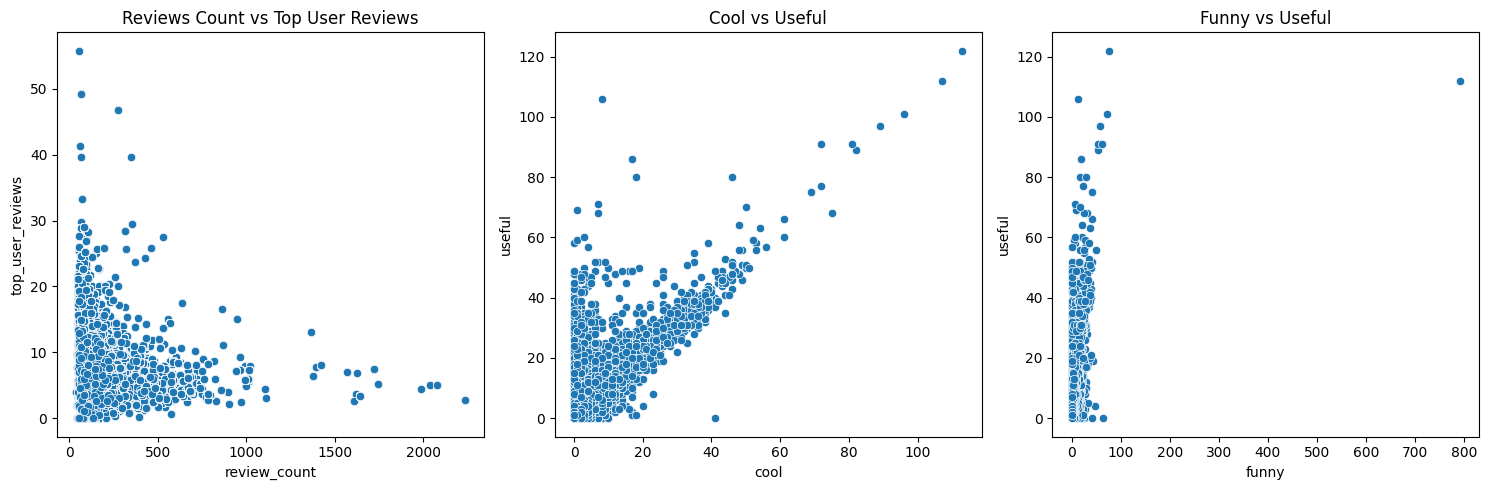

In [20]:
# Pair-wise plots
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='review_count', y='top_user_reviews')
plt.title('Reviews Count vs Top User Reviews')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='cool', y='useful')
plt.title('Cool vs Useful')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='funny', y='useful')
plt.title('Funny vs Useful')

plt.tight_layout()
plt.show()

### Reviews Count vs Top User Reviews: 

This scatter plot shows the relationship between the number of reviews (on the x-axis) and the top user reviews (on the y-axis). Each point represents an observation (likely a business or user) in the dataset. There seems to be a trend where the majority of observations have a relatively low count of both reviews and top user reviews, with only a few observations having high numbers. It suggests that businesses or users with a high number of reviews do not necessarily have a high number of top user reviews, and vice versa.

### Cool vs Useful: 

The second plot displays a positive correlation between the number of times a review was rated as 'cool' (on the x-axis) and the number of times it was rated as 'useful' (on the y-axis). The upward trend indicates that reviews that are considered 'cool' are often also considered 'useful'. The concentration of points towards the origin suggests that most reviews receive low ratings in both categories, but as one increases, so does the other.

### Funny vs Useful: 

Similar to the 'Cool vs Useful' plot, this plot shows the relationship between 'funny' and 'useful' ratings of reviews. There is also a positive correlation here, but it appears slightly less strong than the 'cool' vs 'useful' correlation. Again, most reviews have low 'funny' and 'useful' counts, but reviews that are found to be 'funny' tend to be considered 'useful' as well.

In [21]:
df.dtypes

review_id            object
user_id              object
business_id          object
stars_review        float64
useful                int64
funny                 int64
cool                  int64
text                 object
date                 object
name                 object
address              object
city                 object
state                object
postal_code         float64
latitude            float64
longitude           float64
stars_business      float64
review_count          int64
is_open               int64
attributes           object
categories           object
hours                object
Day_of_Week           int64
Month                 int64
Year                  int64
Time_of_Day           int64
top_user_reviews    float64
Day_of_Week_str      object
Month_str            object
Time_of_Day_str      object
dtype: object

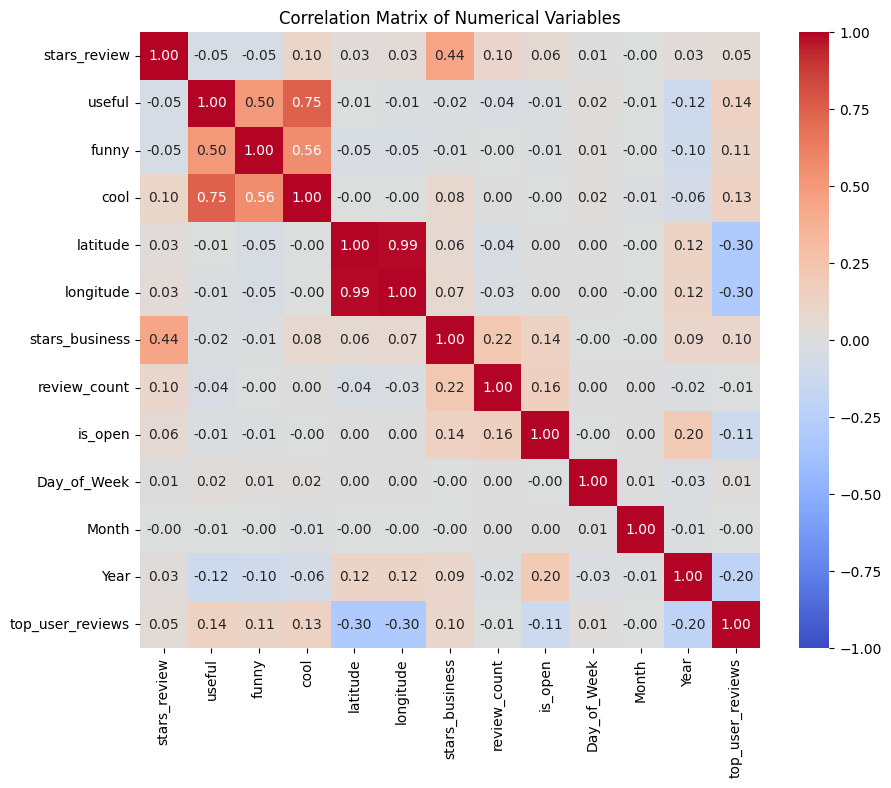

In [22]:
# Selecting numerical columns for the correlation matrix
numerical_cols = ['stars_review', 'useful', 'funny', 'cool', 'latitude', 'longitude',
                  'stars_business', 'review_count', 'is_open', 'Day_of_Week', 'Month',
                  'Year', 'top_user_reviews']

# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Optionally, you can visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Correlation matrix for various numerical variables:

- stars_review has a moderate positive correlation with stars_business (0.40), which suggests that reviews tend to be higher for businesses with higher overall ratings.
- useful, funny, and cool are strongly correlated with each other, with correlations ranging from 0.55 to 0.77. This indicates that reviews which are marked as useful also tend to be marked as funny or cool, and vice versa.
- latitude and longitude show a nearly perfect negative correlation (-0.99) with each other, which is unusual and could indicate that there's a specific geographic pattern to the businesses in your dataset, possibly along a diagonal line.
- review_count shows a moderate positive correlation with stars_business (0.20) and a slight correlation with is_open (0.15), suggesting that businesses with more reviews tend to have higher ratings and are more likely to be open.
- top_user_reviews has a negative correlation with both latitude and longitude (-0.33), which may imply that top users tend to review businesses located in a specific area.
- Day_of_Week, Month, and Year show very little to no correlation with the other variables, suggesting that the time a review was written doesn't strongly influence the numerical ratings and attributes.

The heatmap's color range from blue to red indicates the strength and direction of the correlation, with blue representing a strong negative correlation and red representing a strong positive correlation. The shade of the color indicates the strength of the correlation, with lighter shades indicating weaker correlations and darker shades indicating stronger correlations.

In [23]:
df.stars_review.value_counts()

stars_review
5.0    327459
4.0    175339
3.0     78551
1.0     76297
2.0     55501
Name: count, dtype: int64

In [24]:
df.stars_business.value_counts()

stars_business
4.0    266655
4.5    198100
3.5    142017
3.0     54378
2.5     20752
5.0     12184
2.0     11709
1.5      5812
1.0      1540
Name: count, dtype: int64

In [25]:
df.review_count.value_counts()

review_count
54    4599
57    4396
65    4328
74    4183
51    4098
      ... 
45     260
44     102
43      54
42      52
40      51
Name: count, Length: 531, dtype: int64

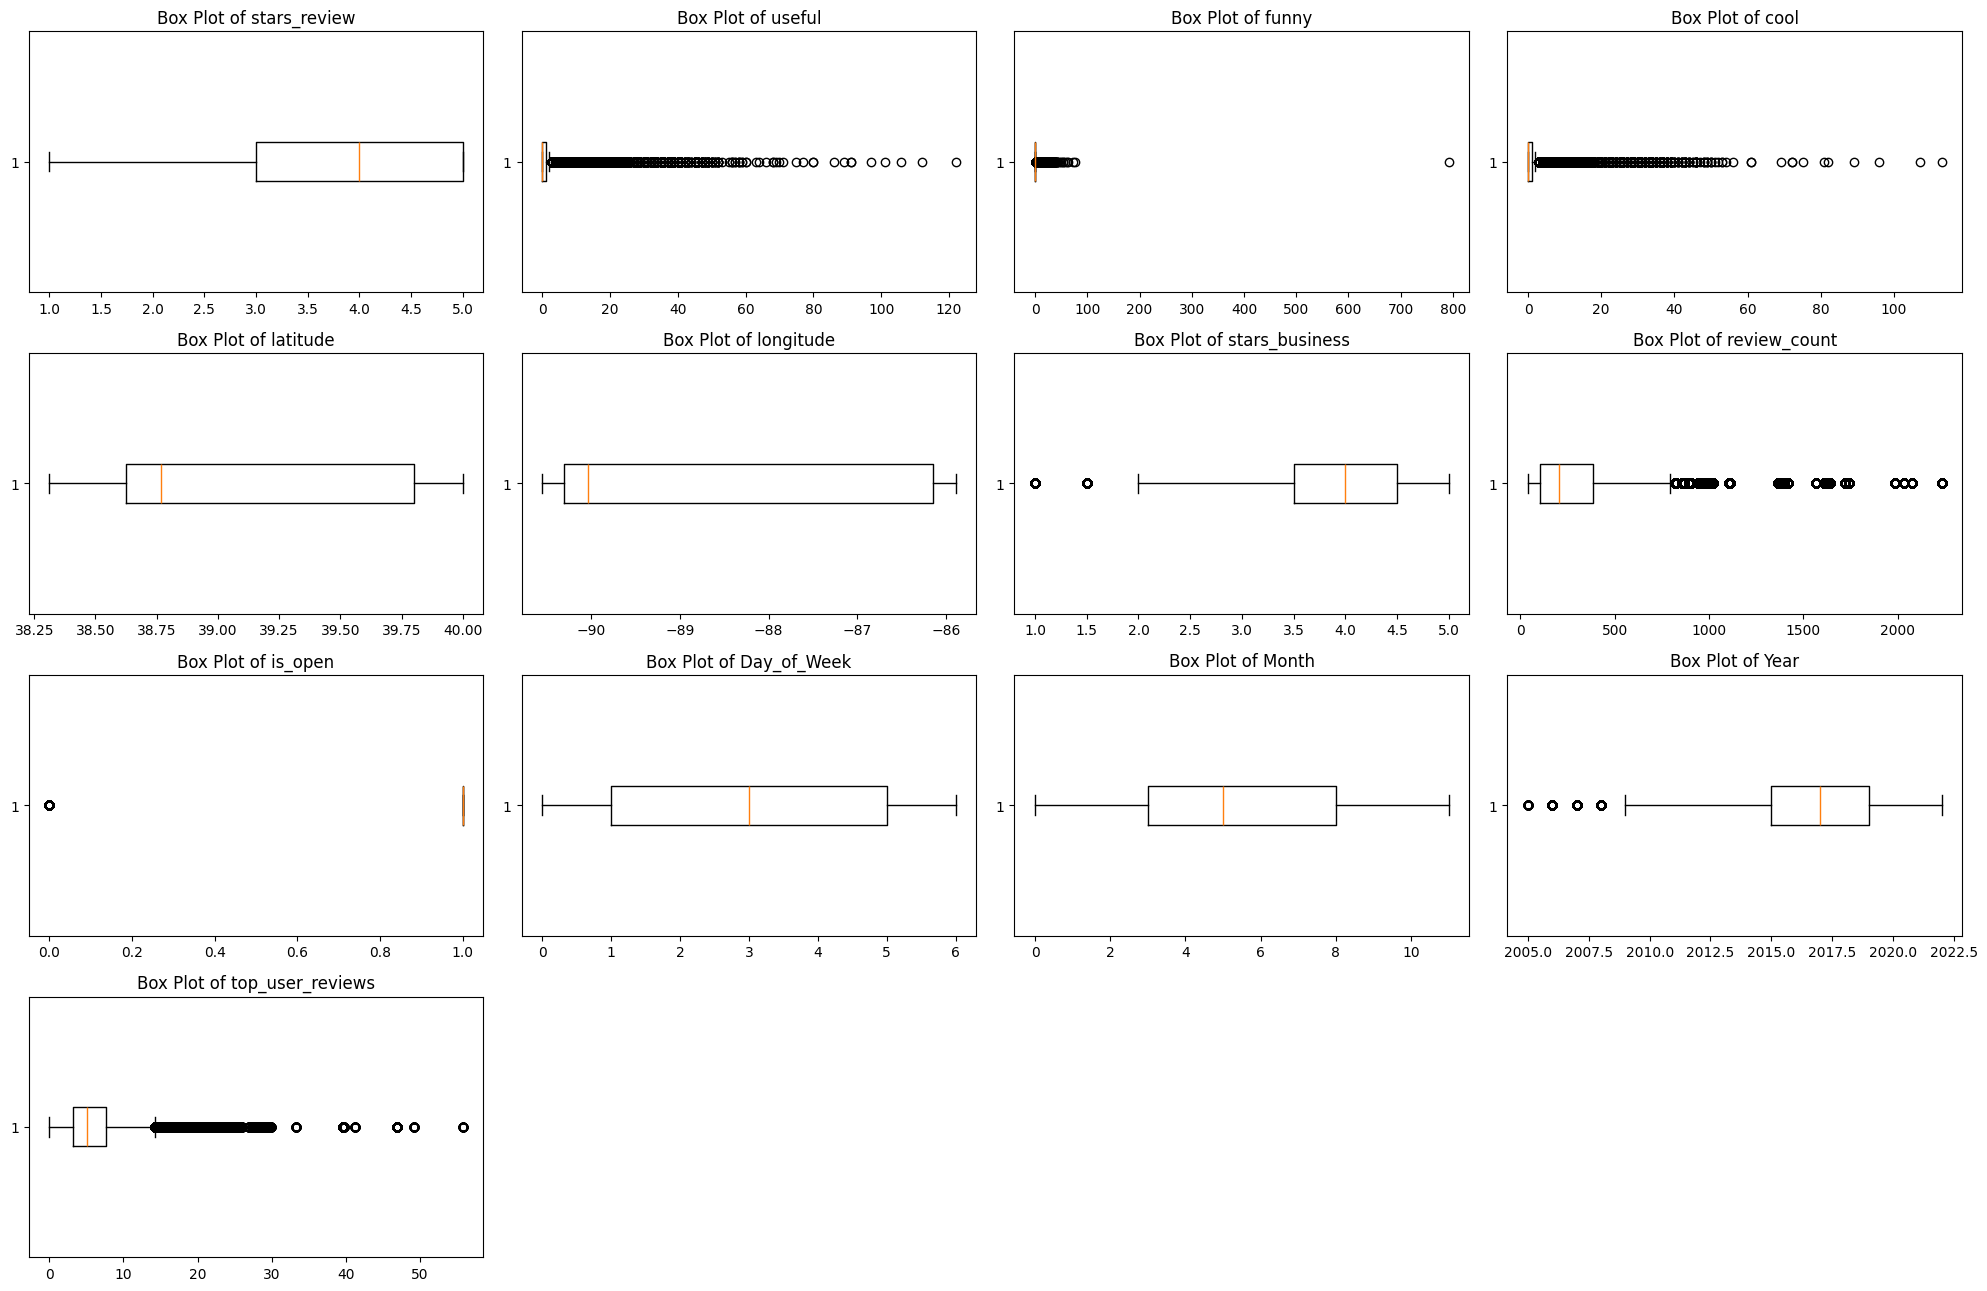

stars_review: 0 outliers
useful: 77997 outliers
funny: 94102 outliers
cool: 28998 outliers
latitude: 0 outliers
longitude: 0 outliers
stars_business: 7352 outliers
review_count: 47759 outliers
is_open: 122935 outliers
Day_of_Week: 0 outliers
Month: 0 outliers
Year: 6722 outliers
top_user_reviews: 33988 outliers


In [26]:
import matplotlib.pyplot as plt

# Dictionary to store the number of outliers for each variable
outliers_count = {}

# Creating a 5x4 grid for subplots to accommodate all variables
plt.figure(figsize=(20, 16))

# Iterating through each numerical variable
for i, variable in enumerate(numerical_cols, 1):
    # Calculating quartiles and IQR for each variable
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)
    IQR = Q3 - Q1
    
    # Defining lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifying outliers
    outliers = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    
    # Counting the number of outliers
    num_outliers = outliers.sum()
    outliers_count[variable] = num_outliers

    # Creating box plots with outliers for each variable
    plt.subplot(5, 4, i)
    plt.boxplot(df[variable].dropna(), vert=False, showfliers=True)  # Drop NA values for plotting
    plt.title(f'Box Plot of {variable}')

plt.tight_layout()
plt.show()

# Displaying the number of outliers for each variable
for variable, count in outliers_count.items():
    print(f'{variable}: {count} outliers')

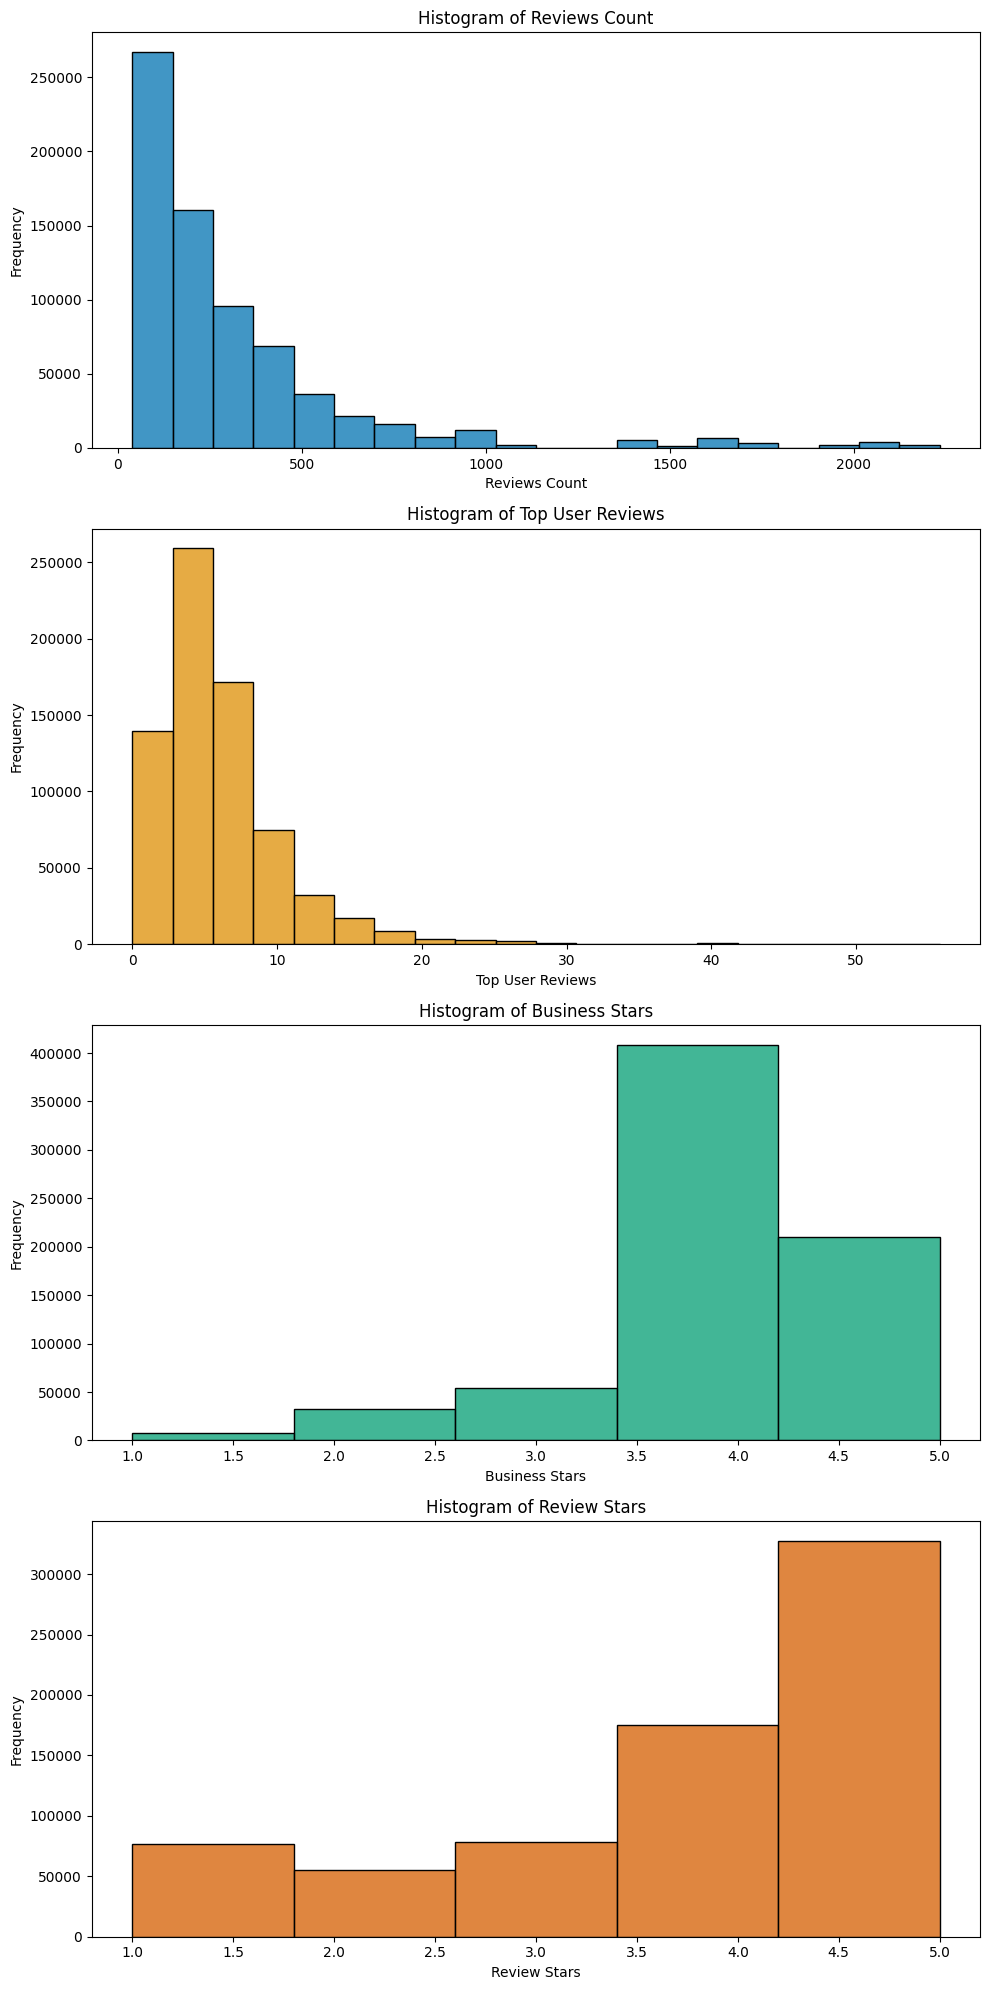

In [27]:
# Set up the figure and axes
fig, axes = plt.subplots(4, 1, figsize=(10, 20))  # Adjusted to have 4 rows for the 4th histogram

# Define colorblind-friendly colors
colorblind_colors = sns.color_palette("colorblind")

# Plot histogram for 'review_count'
sns.histplot(df['review_count'], bins=20, kde=False, ax=axes[0], color=colorblind_colors[0])
axes[0].set_title('Histogram of Reviews Count')
axes[0].set_xlabel('Reviews Count')
axes[0].set_ylabel('Frequency')

# Plot histogram for 'top_user_reviews'
sns.histplot(df['top_user_reviews'], bins=20, kde=False, ax=axes[1], color=colorblind_colors[1])
axes[1].set_title('Histogram of Top User Reviews')
axes[1].set_xlabel('Top User Reviews')
axes[1].set_ylabel('Frequency')

# Plot histogram for 'stars_business'
sns.histplot(df['stars_business'], bins=5, kde=False, ax=axes[2], color=colorblind_colors[2])
axes[2].set_title('Histogram of Business Stars')
axes[2].set_xlabel('Business Stars')
axes[2].set_ylabel('Frequency')

# Plot histogram for 'stars_review'
sns.histplot(df['stars_review'], bins=5, kde=False, ax=axes[3], color=colorblind_colors[3])
axes[3].set_title('Histogram of Review Stars')
axes[3].set_xlabel('Review Stars')
axes[3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### Histogram of Reviews Count:

This histogram shows a very skewed distribution where the vast majority of data points have a low reviews count.
The frequency decreases sharply as the reviews count increases, which suggests that there are very few businesses with a high number of reviews.
The long tail to the right indicates that while rare, there are entities with a very high number of reviews.
Histogram of Top User Reviews:

This distribution is also skewed to the right but appears less extreme than the reviews count.
Most of the top user reviews are concentrated in the lower end of the scale, with the frequency dropping off as the number of top user reviews increases.
This suggests that top-rated reviews from users are relatively uncommon.

### Histogram of Stars:

The star ratings histogram appears to be left-skewed, with a lower frequency of low star ratings and a higher frequency of high star ratings.
There is a clear preference or tendency towards higher ratings, with 4.0 to 5.0 stars being the most common.
This could indicate that either the majority of reviews are positive or that there is a bias in which users are more likely to leave a review when they have a positive experience.

The skewness in the reviews count and top user reviews suggests that there is a large number of entities with very few reviews and a small number with a lot of reviews. The star ratings distribution indicates a tendency towards positive reviews, which might be important for understanding user behavior and the overall sentiment reflected in the dataset.

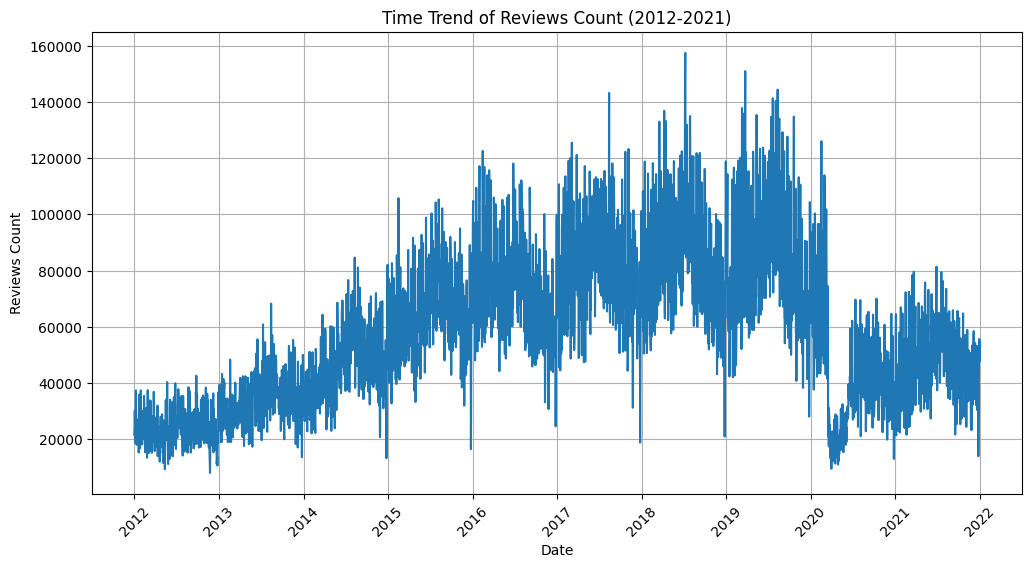

In [28]:
# Convert 'date' column to datetime type
df['date'] = pd.to_datetime(df['date'])

# Filter data for the years 2012 to 2021
df_filtered = df[(df['date'].dt.year >= 2012) & (df['date'].dt.year <= 2021)]

# Group filtered data by date and calculate the total reviews count for each date
daily_reviews_count_filtered = df_filtered.groupby('date')['review_count'].sum().reset_index()

# Plot time trend of reviews count for the filtered data
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='review_count', data=daily_reviews_count_filtered)
plt.title('Time Trend of Reviews Count (2012-2021)')
plt.xlabel('Date')
plt.ylabel('Reviews Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [29]:
df.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,...,categories,hours,Day_of_Week,Month,Year,Time_of_Day,top_user_reviews,Day_of_Week_str,Month_str,Time_of_Day_str
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19,Milktooth,...,"Beer, Wine & Spirits, Cafes, Coffee & Tea, Res...","{'Monday': '10:0-15:0', 'Friday': '10:0-15:0',...",6,1,2015,2,6.40,Sunday,February,Afternoon
1,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27,Brio Italian Grille,...,"Bars, Pizza, Nightlife, Cocktail Bars, Italian...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",0,6,2014,4,7.43,Monday,July,Night
2,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,1,0,0,The hubby and I have been here on multiple occ...,2014-08-10,Olio,...,"Wine Bars, Bars, Nightlife, American (New), Me...","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21...",3,1,2014,1,8.03,Thursday,February,Lunch
3,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5.0,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13,Ted Drewes,...,"Ice Cream & Frozen Yogurt, Food, Local Flavor,...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:30',...",5,10,2009,1,7.72,Saturday,November,Lunch
4,ZVvhc3Go7v5I8XTiVoWmqQ,WBpQDAZymU0dhIqXcACGNw,ut6fi2W2YaipNOqvi7e0jw,3.0,0,0,0,"Upland is a brewery based out of Bloomington, ...",2014-11-12,Upland Carmel Tap House,...,"Nightlife, Food, Bars, Breweries, Pizza, Brewp...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-22:0', ...",6,9,2014,2,4.69,Sunday,October,Afternoon


In [43]:
df.to_csv("df_preprocessed.csv", index=False)

# Step 4: Review Text Data Preperation and Features Generation

### Preprocessing Text (Noise Removal)

In [12]:
import pandas as pd

# Load the data
file_path = 'df_preprocessed.csv'
df = pd.read_csv(file_path)

In [13]:
# REMOVE IF RUNNING FULL
df = df.sample(frac=0.50, random_state=42)
#df.shape

#df.to_csv("df_sampled.csv", index=False)
#df = pd.read_csv("df_sampled.csv")

In [14]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import text as sklearn_text
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anastasiiaprydius/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anastasiiaprydius/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
#!pip install textatistic

In [16]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['sentence_count'] = df['text'].apply(lambda x: x.count('.') + x.count('?') + x.count('!'))
df['avg_word_length'] = df['text'].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()) if len(str(x).split()) > 0 else 0)
df['unique_words'] = df['text'].apply(lambda x: len(set(str(x).split())))

In [17]:
df.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool,text,date,name,...,Year,Time_of_Day,top_user_reviews,Day_of_Week_str,Month_str,Time_of_Day_str,word_count,sentence_count,avg_word_length,unique_words
241816,kOQqLid0kdbDFavkqiQKEA,pFiqsaHsYSFh0OujW8f4oQ,S26FJcC298XNpN2cZiwOrA,5.0,2,0,0,I LOVE pizza and this place hit the spot. Wen...,2015-01-06,Pi Pizzeria - Central West End,...,2015,4,5.98,Saturday,May,Night,142,17,4.739437,106
54643,rOVLKNaGl1bjlMcZbgNF4A,rk2ZkhhideZxVOdXNFQl5w,nRKndeZLQ3eDL10UMwS2rQ,5.0,0,0,0,"According to a helpful Uber driver, Ted Drewes...",2019-01-30,Ted Drewes,...,2019,4,7.72,Sunday,May,Night,136,12,4.522059,102
431861,woQf-FwOCuh7-xHvodfynQ,qhbZc-X19j1fjV3N52Jbrg,vIg_WNUAZHXcqe-9JdWJ7w,2.0,0,0,0,It is always sad when the wait is an hour with...,2021-09-07,St. Louis Union Station Soda Fountain,...,2021,4,0.87,Saturday,December,Night,83,7,4.060241,64
615733,6n0KKCaACFou6mumpyuWGQ,aHxYkJqD7sHH6c0IflwLzA,UNJVuO31CU7JuZaydoaauA,4.0,0,0,0,Joe Boccardi's has been around saint Louis for...,2019-07-25,Joe Boccardi's Ristorante,...,2019,0,1.30,Friday,June,Morning,75,4,5.000000,60
290132,Q4gNuvNXAowWfvumQTG_tg,NiwFYDdEpAzr4kaLeBEzyQ,HG-yf6cLiA8cCFk8TDQoWA,4.0,0,0,0,Great experience! History and local must!! \...,2018-12-18,Red Key Tavern,...,2018,4,14.89,Saturday,March,Night,112,15,4.401786,87


In [18]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Assuming necessary NLTK resources are already downloaded

# 1. Tokenize the text
df['processed_text'] = df['text'].apply(lambda text: word_tokenize(text.lower()))
df['processed_text']

241816    [i, love, pizza, and, this, place, hit, the, s...
54643     [according, to, a, helpful, uber, driver, ,, t...
431861    [it, is, always, sad, when, the, wait, is, an,...
615733    [joe, boccardi, 's, has, been, around, saint, ...
290132    [great, experience, !, history, and, local, mu...
                                ...                        
115720    [i, had, a, very, pleasant, visit, to, green, ...
240010    [i, no, longer, live, in, st., louis, ,, or, e...
691345    [food, was, delicious, and, our, server, valen...
692921    [i, felt, as, if, i, were, at, my, grandmother...
599093    [my, favorite, thai, food, in, fishers, ;, it,...
Name: processed_text, Length: 356574, dtype: object

In [19]:
import re  # Import the regex module

# 2. Preprocess tokens to remove non-alphanumeric characters from within tokens
df['processed_text'] = df['processed_text'].apply(lambda tokens: [re.sub(r'\W+', '', word) for word in tokens])

# Remove empty tokens that may result from removing non-alphanumeric characters
df['processed_text'] = df['processed_text'].apply(lambda tokens: [word for word in tokens if word])

In [20]:
# Function to remove numbers from text
# Function to remove numbers from text
def remove_numbers(tokens):
    # Convert the list of tokens to a string
    text = ' '.join(tokens)
    # Remove numerical values and their corresponding strings
    text = re.sub(r'\b\d+\b', '', text)
    # Convert the string back to a list of tokens
    return text.split()

# Apply the function to the 'processed_text' column
df['processed_text'] = df['processed_text'].apply(remove_numbers)
df['processed_text']

241816    [i, love, pizza, and, this, place, hit, the, s...
54643     [according, to, a, helpful, uber, driver, ted,...
431861    [it, is, always, sad, when, the, wait, is, an,...
615733    [joe, boccardi, s, has, been, around, saint, l...
290132    [great, experience, history, and, local, must,...
                                ...                        
115720    [i, had, a, very, pleasant, visit, to, green, ...
240010    [i, no, longer, live, in, st, louis, or, even,...
691345    [food, was, delicious, and, our, server, valen...
692921    [i, felt, as, if, i, were, at, my, grandmother...
599093    [my, favorite, thai, food, in, fishers, it, al...
Name: processed_text, Length: 356574, dtype: object

In [21]:
# 3. Remove stop words

# Existing set of English stop words
stop_words = set(stopwords.words('english'))

# Custom list of additional stop words
custom_stop_words = ['nt', 'every', 'also', 'one', 'would', 'st', 'loui', 'ye']

# Extend the existing set with your custom stop words
stop_words.update(custom_stop_words)

# Apply the updated stop words list to filter out both default and custom stop words
df['processed_text'] = df['processed_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])
df['processed_text']

241816    [love, pizza, place, hit, spot, went, group, c...
54643     [according, helpful, uber, driver, ted, drewes...
431861    [always, sad, wait, hour, ton, tables, workers...
615733    [joe, boccardi, around, saint, louis, forever,...
290132    [great, experience, history, local, must, went...
                                ...                        
115720    [pleasant, visit, green, ginger, conveniently,...
240010    [longer, live, louis, even, missouri, matter, ...
691345    [food, delicious, server, valentini, great, dr...
692921    [felt, grandmother, table, food, say, simply, ...
599093    [favorite, thai, food, fishers, always, tastes...
Name: processed_text, Length: 356574, dtype: object

#####  Lemmatization, unlike stemming, reduces words to their base or dictionary form. It requires more knowledge about the word's part-of-speech and a more complex lookup, but it generally results in more readable words.

### WordNetLemmatizer

In [22]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
#nltk.download('averaged_perceptron_tagger')

In [23]:
# Initializing the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# 4. Lemmatize
df['processed_text'] = df['processed_text'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Debug: Verify that the content is as expected
df['processed_text']

241816    [love, pizza, place, hit, spot, went, group, c...
54643     [according, helpful, uber, driver, ted, drewes...
431861    [always, sad, wait, hour, ton, table, worker, ...
615733    [joe, boccardi, around, saint, louis, forever,...
290132    [great, experience, history, local, must, went...
                                ...                        
115720    [pleasant, visit, green, ginger, conveniently,...
240010    [longer, live, louis, even, missouri, matter, ...
691345    [food, delicious, server, valentini, great, dr...
692921    [felt, grandmother, table, food, say, simply, ...
599093    [favorite, thai, food, fisher, always, taste, ...
Name: processed_text, Length: 356574, dtype: object

In [24]:
# 5. Join the tokens back into a string if required for further processing
df['processed_text'] = df['processed_text'].apply(lambda tokens: ' '.join(tokens))

### Sentiment Intensity Analyzer

In [13]:
#import pandas as pd

# Load the data
#file_path = 'df_processed.csv'
#df = pd.read_csv(file_path)

In [14]:
#!pip install textblob

In [40]:
from textblob import TextBlob
df['subjectivity'] = df.apply(lambda x: TextBlob(x['processed_text']).sentiment.subjectivity, axis=1)
df['polarity'] = df.apply(lambda x: TextBlob(x['processed_text']).sentiment.polarity, axis=1)
df.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool_x,text,date,name_x,...,american,dine,middle,Keyword,LSA_Sum,LSA_Max,numeric_user_id,Business_id,subjectivity,polarity
217104,0z3re-DV2yuRpfTEdrj4pA,up0PIBz1gxnDBxNj8hSHJA,Nk-SJhPlDBkAZvfsADtccA,4.0,0,0,1,Went there Sunday while visiting with my son. ...,2019-06-24,HopCat - Broad Ripple,...,-0.026591,-0.000914,-0.028574,[[beer]],1.558447,0.343029,0,0,0.619444,0.388889
161163,yVD72bGsDYn01OpMswWBLg,fAoQz9WxZmVlj-3Yo2oeHA,NTiPDvC99_yK0RY9ltnLgQ,2.0,1,0,0,"I'm not sure what happened when I visited, but...",2013-11-16,Ale Emporium,...,-0.004177,0.010769,0.014224,[[spicy]],1.278274,0.320955,1,1,0.663889,0.261250
351797,aoC3nmlfUG9DPlJkGiyeKg,Y71dUNSDk0ASTvq2-nl5ng,dzeBiAu0VAaVBbMwcV9GFw,3.0,1,0,0,"**This is really a 3.5-4 star review, but, if ...",2015-01-11,Rooster - South Grand,...,0.007471,-0.010793,-0.008198,[[great selection]],1.618646,0.262699,2,2,0.485436,0.178677
29863,5vdNTf2xGh0viqSxYYkElg,TV2ghbVNYUDLgeMFg2bL6g,ujWCzhA9YS2fXzXPW9Lc9Q,5.0,0,1,2,Great food and service with a smile!! I'm from...,2016-06-10,Flap-Jacks Pancake House,...,0.005025,-0.012845,0.026402,[[breakfast]],2.085548,0.340540,3,3,0.514815,0.308333
28949,6Ar7OZ0MjLMSoxhuNlwIkQ,sokKixeD9uDPcSFL--DwNQ,idf-eiurCrbsLRcH7c9zmw,5.0,1,0,1,One of the best overall restaurants in Indy. ...,2009-02-09,Oakleys Bistro,...,-0.017498,-0.005024,-0.015244,[[sushi]],-0.030858,0.248679,4,4,0.485714,0.428571


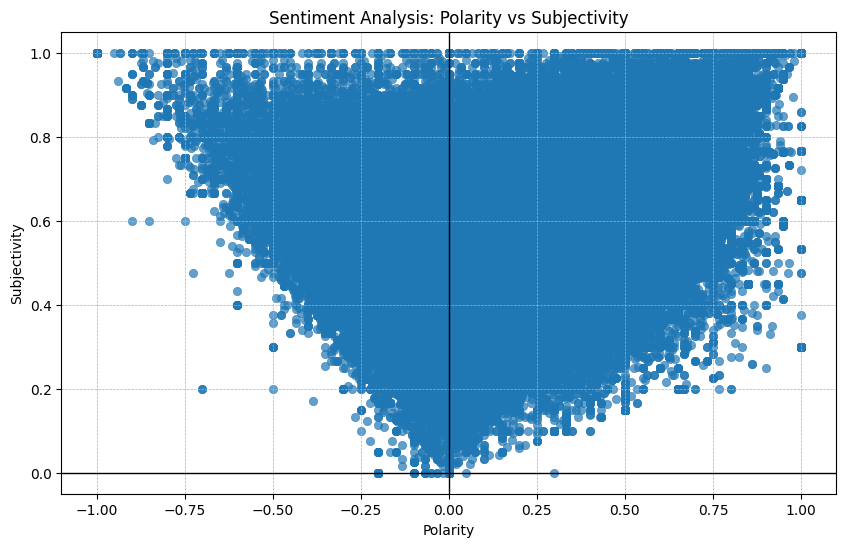

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
sns.scatterplot(data=df, x='polarity', y='subjectivity', alpha=0.7, edgecolor=None)

plt.title('Sentiment Analysis: Polarity vs Subjectivity')  # Title of the plot
plt.xlabel('Polarity')  # X-axis label
plt.ylabel('Subjectivity')  # Y-axis label
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid for better readability
plt.axhline(0, color='black', lw=1)  # Add a horizontal line at y=0
plt.axvline(0, color='black', lw=1)  # Add a vertical line at x=0

# Show the plot
plt.show()

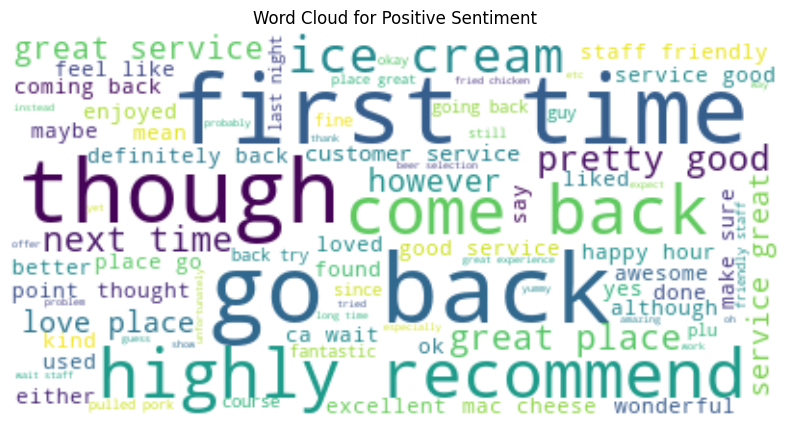

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

stop_words = [
    "food", "take", "asked", "said", "told", "left", "think", "know", "give", "put",
    "called", "little", "lot", "one", "every", "everything", "even",
    "much", "too", "very", "really", "actually", "restaurant", "well"
]

# Filter the DataFrame for positive and negative sentiments
positive_text = " ".join(df[df['polarity'] > 0]['processed_text'])
negative_text = " ".join(df[df['polarity'] < 0]['processed_text'])

# Generate a word cloud image for positive sentiment
wordcloud_pos = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(positive_text)

# Generate a word cloud image for negative sentiment
wordcloud_neg = WordCloud(stopwords=stop_words, max_font_size=50, max_words=100, background_color="white").generate(negative_text)

# Display the generated image for positive sentiment
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Positive Sentiment')
plt.show()

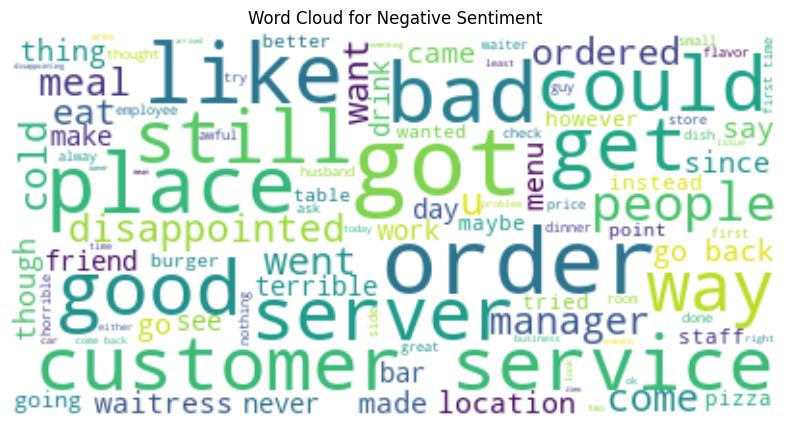

In [18]:
# Display the generated image for negative sentiment
plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Negative Sentiment')
plt.show()

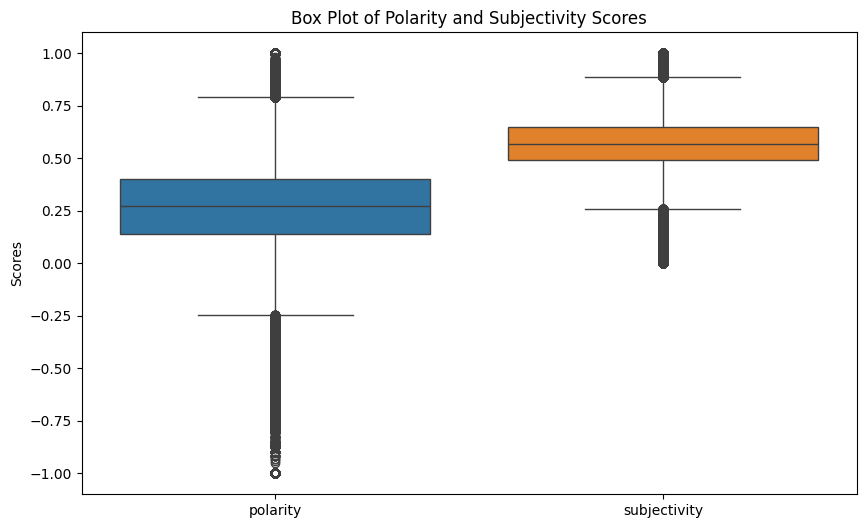

In [19]:
# Box Plot for Polarity and Subjectivity
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['polarity', 'subjectivity']])
plt.title('Box Plot of Polarity and Subjectivity Scores')
plt.ylabel('Scores')
plt.show()

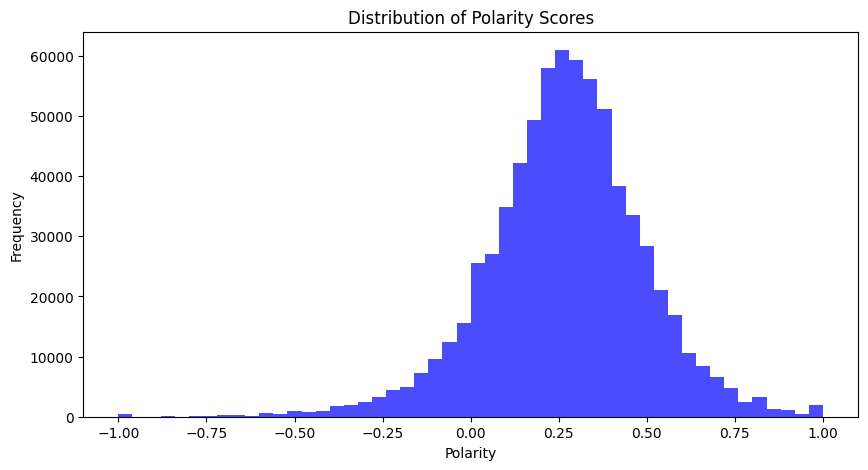

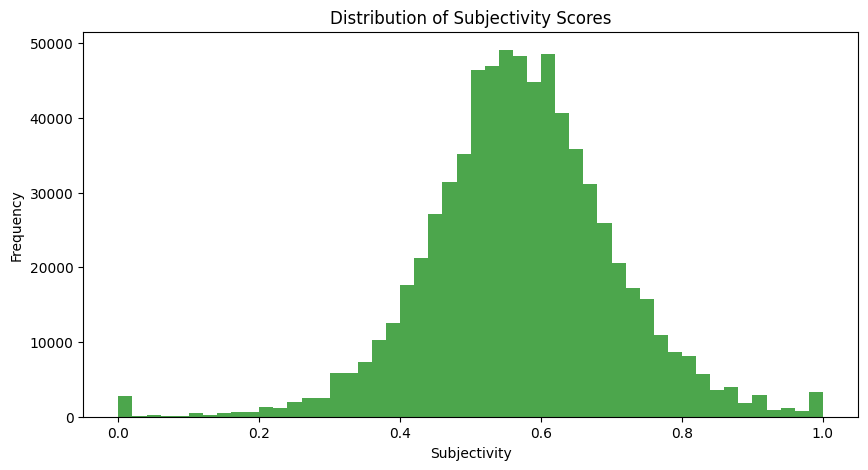

In [20]:
import matplotlib.pyplot as plt

# Polarity Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['polarity'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Subjectivity Histogram
plt.figure(figsize=(10, 5))
plt.hist(df['subjectivity'], bins=50, alpha=0.7, color='green')
plt.title('Distribution of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

- Polarity: The x-axis represents polarity, which ranges from -1 to 1. Polarity indicates sentiment, where -1 is extremely negative, 0 is neutral, and 1 is extremely positive. The distribution of points along the x-axis suggests that there are many neutral sentiments (polarity close to 0) and a fairly even spread of positive and negative sentiments.

- Subjectivity: The y-axis shows subjectivity, which ranges from 0 to 1. A score closer to 1 indicates that the text is subjective (opinionated), while a score closer to 0 suggests the text is objective (factual). The plot shows a wide range of subjectivity scores, with many texts being highly subjective.

- Density of Points: The density of the points suggests that there are a significant number of reviews with neutral sentiment (polarity around 0) that are highly subjective. Additionally, there is a relatively even spread of subjectivity scores across different polarities.

- Neutral Sentiments: There's a notable concentration of points around the zero polarity, which suggests that a lot of the text content is neutral, or the sentiment analysis tool used has a tendency to categorize content as neutral.

- Correlation: There does not seem to be a clear linear correlation between polarity and subjectivity. This implies that the sentiment of the text (positive, negative, neutral) does not necessarily correlate with how subjective or objective the text is.

Overall, the plot indicates a dataset with a rich variety of sentiments and subjectivities, which could be representative of a diverse set of opinions and expressions in the analyzed text data.

In [21]:
# NLTK’s built-in SentimentIntensityAnalyzer to compute sentiment scores
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Download the vader lexicon
#nltk.download('vader_lexicon')

In [22]:
sia = SentimentIntensityAnalyzer()

# Function to get the compound score
def get_sentiment(text):
    return sia.polarity_scores(text)['compound']

# Apply the function to your preprocessed text
df['sentiment_score'] = df['processed_text'].apply(get_sentiment)

# Categorize scores into positive, neutral, and negative
df['sentiment_category'] = pd.cut(df['sentiment_score'], bins=[-1, -0.01, 0.01, 1], labels=['negative', 'neutral', 'positive'])

/var/folders/96/j4nqnscs4mq06_gymf2v_98h0000gn/T/ipykernel_58917/1632712376.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='colorblind')


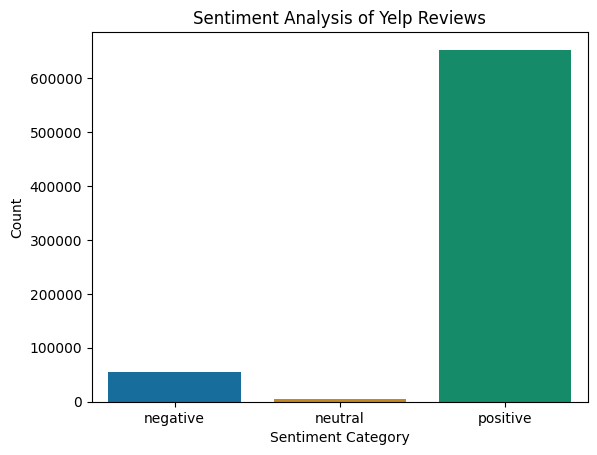

/var/folders/96/j4nqnscs4mq06_gymf2v_98h0000gn/T/ipykernel_58917/1632712376.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='stars_business', y='sentiment_score', data=df, palette='colorblind')


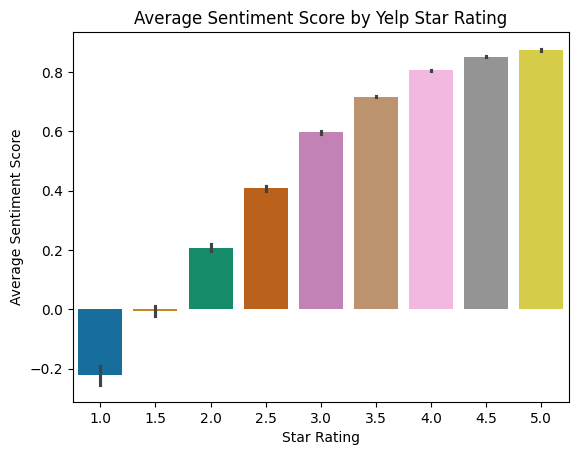

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of sentiment categories using a colorblind-friendly palette
sns.countplot(x='sentiment_category', data=df, palette='colorblind')
plt.title('Sentiment Analysis of Yelp Reviews')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Barplot of average sentiment scores by star rating
# Removed the 'hue' parameter since it's the same as the 'x' variable
sns.barplot(x='stars_business', y='sentiment_score', data=df, palette='colorblind')
plt.title('Average Sentiment Score by Yelp Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Sentiment Score')
plt.show()

The firts bar chart is showing the count of reviews classified into three sentiment categories: negative, neutral, and positive. The overwhelming majority of reviews are classified as positive, indicating that most reviewers left favorable feedback. There are far fewer neutral reviews, and a smaller number still of negative reviews.

The second bar chart is displaying the average sentiment score for each Yelp star rating, ranging from 1 to 5 stars. There's a clear trend of increasing sentiment score with higher star ratings. Reviews with 1-star ratings have the lowest average sentiment score, which progressively increases with the star ratings, peaking at 5 stars. This suggests that the sentiment analysis likely correlates well with the star ratings given by users, where higher star ratings are associated with more positive sentiment scores.

Together, these plots might indicate the effectiveness of the sentiment analysis model in capturing the overall sentiment of the reviews, as well as the distribution of sentiment across different review ratings on Yelp. The correlation between the average sentiment score and the star rating also suggests that the sentiment analysis model is capturing the intuitive trend that more stars indicate more positive sentiments.

In [24]:
df.to_csv("df_processed.csv", index=False)

### TF-IDF vectorization process using CountVectorizer followed by TfidfTransformer

In [25]:
#import pandas as pd

# Load the data
#file_path = 'df_processed.csv'
#df = pd.read_csv(file_path)

In [25]:
# Getting a count of words from the documents
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Ngram_range is set to 1,2 - meaning either single or two word combination will be extracted
cvec = CountVectorizer(min_df=0.005, max_df=0.9, ngram_range=(1, 2))
cvec.fit(df['processed_text'])

CountVectorizer(max_df=0.9, min_df=0.005, ngram_range=(1, 2))

In [26]:
# Creating the bag-of-words representation
cvec_counts = cvec.transform(df['processed_text'])
print('sparse matrix shape:', cvec_counts.shape)
print('nonzero count:', cvec_counts.nnz)
print('sparsity: %.2f%%' % (100.0 * cvec_counts.nnz / (cvec_counts.shape[0] * cvec_counts.shape[1])))

sparse matrix shape: (356574, 1632)
nonzero count: 13058949
sparsity: 2.24%


In [27]:
# Instantiating and applying the TfidfTransformer
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(cvec_counts)

In [28]:
# Converting to a dense array and creating a DataFrame
dense_transformed_weights = transformed_weights.toarray()
vocab = cvec.get_feature_names_out()
model = pd.DataFrame(dense_transformed_weights, columns=vocab)

In [29]:
print(transformed_weights.shape)
print(len(vocab))

(356574, 1632)
1632


#### Dimensionality Reduction with Truncated SVD

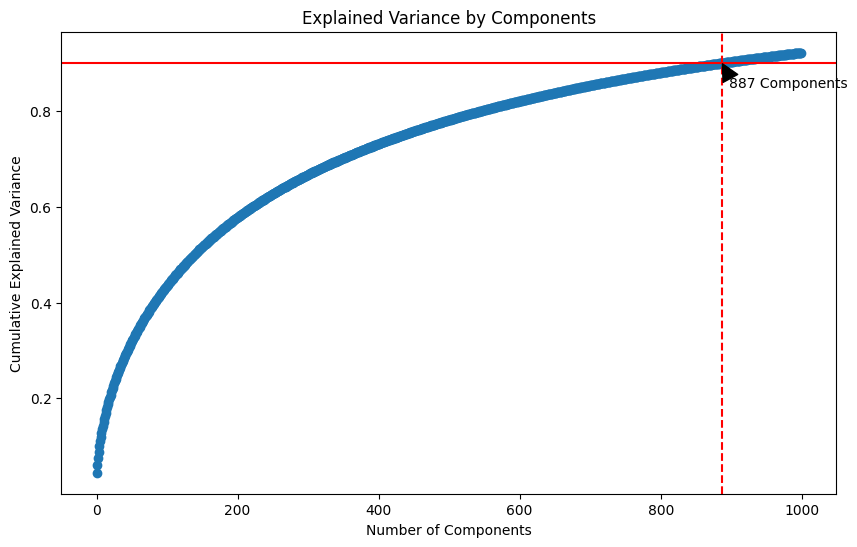

In [30]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import numpy as np

# Assuming transformed_weights and cvec_counts are already defined as per your previous code

# Start with a large n_components, say half of the number of features
n_components = min(1000, cvec_counts.shape[1] - 1)
svd = TruncatedSVD(n_components=n_components)
X_reduced = svd.fit_transform(cvec_counts)

# Plot the explained variance
plt.figure(figsize=(10, 6))
cumulative_explained_variance = svd.explained_variance_ratio_.cumsum()
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Determine the number of components to reach the desired explained variance, e.g., 90%
desired_variance = 0.9
variance_indices = np.where(cumulative_explained_variance >= desired_variance)[0]

if variance_indices.size > 0:
    components_for_desired_variance = variance_indices[0] + 1  # +1 because indices start at 0
    plt.axhline(y=desired_variance, color='r', linestyle='-')  # Draw horizontal line at 90% variance
    plt.axvline(x=components_for_desired_variance, color='r', linestyle='--')  # Draw vertical line
    plt.annotate(f'{components_for_desired_variance} Components', xy=(components_for_desired_variance, desired_variance),
                 xytext=(components_for_desired_variance+10, desired_variance-0.05),
                 arrowprops=dict(facecolor='black', shrink=0.05))
else:
    print(f"No component count found that explains at least {desired_variance * 100}% of the variance. Maximum explained variance is {cumulative_explained_variance[-1]*100:.2f}%.")
    # You might still want to draw the line at the maximum cumulative variance achieved
    max_variance_achieved = cumulative_explained_variance[-1]
    max_variance_component = len(cumulative_explained_variance)
    plt.axhline(y=max_variance_achieved, color='r', linestyle='-')
    plt.axvline(x=max_variance_component, color='r', linestyle='--')
    plt.annotate(f'Max Variance: {max_variance_achieved*100:.2f}%', xy=(max_variance_component, max_variance_achieved),
                 xytext=(max_variance_component-100, max_variance_achieved-0.1),
                 arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

In [31]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# Number of dimensions to reduce to
n_components = 892

# Perform SVD
svd = TruncatedSVD(n_components=n_components)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)

# Fit and transform the data
X_reduced = lsa.fit_transform(cvec_counts)

print(f"Reduced dataset shape: {X_reduced.shape}")

Reduced dataset shape: (356574, 892)


In [32]:
# View the list of all columns in df_numeric
column_list = df.columns.tolist()
print(column_list)

['review_id', 'user_id', 'business_id', 'stars_review', 'useful', 'funny', 'cool', 'text', 'date', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'stars_business', 'review_count', 'is_open', 'attributes', 'categories', 'hours', 'Day_of_Week', 'Month', 'Year', 'Time_of_Day', 'top_user_reviews', 'Day_of_Week_str', 'Month_str', 'Time_of_Day_str', 'word_count', 'sentence_count', 'avg_word_length', 'unique_words', 'processed_text']


In [33]:
import numpy as np

# Fit and transform the data with LSA
X_reduced = lsa.fit_transform(transformed_weights)

# Creating a DataFrame for the reduced features
lsa_features = pd.DataFrame(X_reduced, index=df.index)

# Merging LSA features with original DataFrame 'df'
#df = pd.concat([df, lsa_features], axis=1)

# Getting the top occurrences and weights for the n-grams
occ = np.asarray(cvec_counts.sum(axis=0)).ravel().tolist()
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()

counts_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Occurrences': occ})
weights_df = pd.DataFrame({'Term': cvec.get_feature_names_out(), 'Weight': weights})

top_occurrences = counts_df.sort_values(by='Occurrences', ascending=False).head(25)
top_weights = weights_df.sort_values(by='Weight', ascending=False).head(25)

In [34]:
top_occurrences

,Term,Occurrences
532,food,231199
612,good,200603
1066,place,195859
631,great,176674
1466,time,145509
1280,service,128127
793,like,119426
587,get,115684
83,back,108154
604,go,99492


In [35]:
top_weights

,Term,Weight
532,food,0.041448
631,great,0.038348
612,good,0.037069
1066,place,0.036158
1280,service,0.028535
1466,time,0.027631
587,get,0.022897
83,back,0.022571
793,like,0.022535
604,go,0.021685


In [36]:
# Get the feature names, which are your terms
feature_names = cvec.get_feature_names_out()

# Get the components
components = svd.components_

# For each component, find the index of the feature with the highest coefficient
most_significant_feature_indices = [component.argmax() for component in components]

# Map these indices to the actual terms
most_significant_terms = [feature_names[index] for index in most_significant_feature_indices]

# Now create a DataFrame for the transformed data and set the column names to the most significant terms
df_components = pd.DataFrame(X_reduced, columns=most_significant_terms)

# If you want to add the most significant term per document instead
# You can use the argmax of the rows in your original transformed matrix
document_most_significant_term_indices = transformed_weights.argmax(axis=1)
document_most_significant_terms = [feature_names[index] for index in document_most_significant_term_indices]
df_documents = pd.DataFrame(X_reduced, columns=most_significant_terms)
df_documents['Keyword'] = document_most_significant_terms

# The df_documents now has component names as actual terms and an additional 'Keyword' column
df_documents.head()

,food,great,pizza,pizza,pizza,beer,good,burger,coffee,great,...,helped,relaxing,pm,easily,sad,sad,american,dine,middle,Keyword
0,0.218569,0.088410,0.224874,0.272291,0.014146,0.027839,-0.028655,-0.029176,-0.083154,-0.033311,...,-0.001074,-0.021915,0.001747,0.019287,0.005209,0.031725,0.021385,0.003410,-0.008909,[[crust]]
1,0.229983,-0.039685,0.031623,-0.020645,-0.105080,-0.054654,-0.057145,-0.085604,0.110291,-0.009032,...,-0.008524,-0.005543,0.022202,-0.026181,-0.003546,0.006272,-0.020352,-0.003591,0.021125,[[chocolate]]
2,0.199969,-0.090993,0.032905,-0.036630,-0.070198,0.049229,-0.098073,0.154560,0.084495,0.070607,...,0.006447,0.045254,-0.014955,-0.002487,0.081426,0.027508,-0.008481,-0.008574,-0.022418,[[standing]]
3,0.256275,0.038716,0.281034,0.022439,0.095563,-0.078590,0.084036,-0.008749,-0.043525,-0.031481,...,-0.019599,0.030767,0.008052,0.011758,-0.009795,-0.008694,-0.047680,0.028330,-0.013775,[[louis]]
4,0.270010,0.068443,-0.037804,-0.004081,-0.026501,0.024840,0.046659,-0.017021,0.003712,0.001101,...,-0.029795,0.015426,0.027976,-0.019431,-0.014485,-0.009466,-0.030151,0.010706,-0.000254,[[treat]]


In [37]:
# summing across columns (axis=1) gives the sum of component values for each document
df_documents['LSA_Sum'] = X_reduced.sum(axis=1)

# To calculate the maximum TF-IDF weight for each document in the reduced space,
# you can similarly use the max method
df_documents['LSA_Max'] = X_reduced.max(axis=1)
df_documents.head()

,food,great,pizza,pizza,pizza,beer,good,burger,coffee,great,...,pm,easily,sad,sad,american,dine,middle,Keyword,LSA_Sum,LSA_Max
0,0.218569,0.088410,0.224874,0.272291,0.014146,0.027839,-0.028655,-0.029176,-0.083154,-0.033311,...,0.001747,0.019287,0.005209,0.031725,0.021385,0.003410,-0.008909,[[crust]],1.039675,0.272291
1,0.229983,-0.039685,0.031623,-0.020645,-0.105080,-0.054654,-0.057145,-0.085604,0.110291,-0.009032,...,0.022202,-0.026181,-0.003546,0.006272,-0.020352,-0.003591,0.021125,[[chocolate]],0.194892,0.229983
2,0.199969,-0.090993,0.032905,-0.036630,-0.070198,0.049229,-0.098073,0.154560,0.084495,0.070607,...,-0.014955,-0.002487,0.081426,0.027508,-0.008481,-0.008574,-0.022418,[[standing]],0.712909,0.254917
3,0.256275,0.038716,0.281034,0.022439,0.095563,-0.078590,0.084036,-0.008749,-0.043525,-0.031481,...,0.008052,0.011758,-0.009795,-0.008694,-0.047680,0.028330,-0.013775,[[louis]],-0.085487,0.281034
4,0.270010,0.068443,-0.037804,-0.004081,-0.026501,0.024840,0.046659,-0.017021,0.003712,0.001101,...,0.027976,-0.019431,-0.014485,-0.009466,-0.030151,0.010706,-0.000254,[[treat]],0.206782,0.270010


In [38]:
# Merging the TF-IDF weights back into the original DataFrame
df = pd.merge(df, df_documents, left_index=True, right_index=True)

#### Cluster Analysis

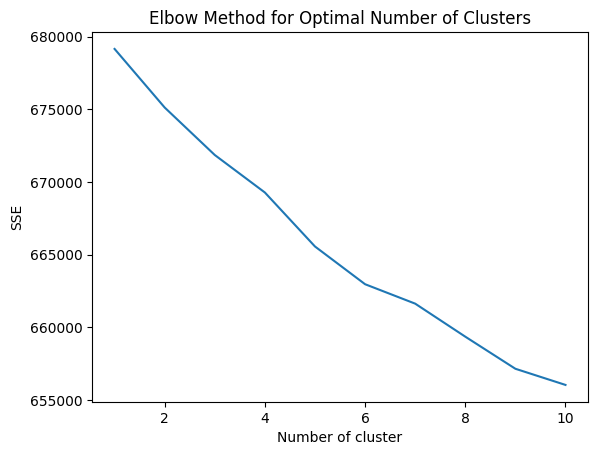

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_reduced)
    sse[k] = kmeans.inertia_

# Plotting the Elbow Curve
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.show()

In [39]:
# Clustering with K-Means
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X_reduced)

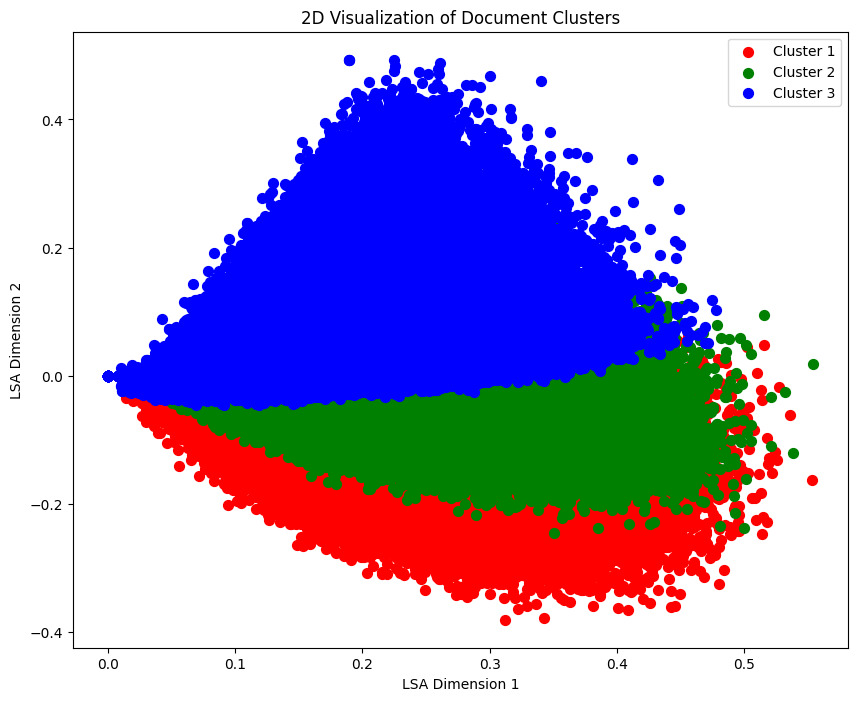

In [40]:
# For visualization, we'll need to reduce the dimensionality to 2D.
# Using TruncatedSVD for consistency with LSA's dimensionality reduction approach.
svd_2d = TruncatedSVD(n_components=2)
lsa_2d = svd_2d.fit_transform(X_reduced)

# Plotting
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange']
for i in range(num_clusters):
    plt.scatter(lsa_2d[clusters == i, 0], lsa_2d[clusters == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

plt.title('2D Visualization of Document Clusters')
plt.xlabel('LSA Dimension 1')
plt.ylabel('LSA Dimension 2')
plt.legend()
plt.show()

In [41]:
# Adding cluster labels to the DataFrame for potential analysis
df['Cluster'] = clusters

In [42]:
import numpy as np

# Separate the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Separate the non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])

df_numeric.shape, df_non_numeric.shape

((713147, 917), (713147, 18))

In [43]:
df_numeric.dtypes

stars_review    float64
useful            int64
funny             int64
cool_x            int64
postal_code     float64
                 ...   
martini         float64
forever         float64
LSA_Sum         float64
LSA_Max         float64
Cluster           int32
Length: 917, dtype: object

In [44]:
# Select only the numeric columns for summary statistics
#numeric_cols = df.select_dtypes(include=[np.number]).columns

# Group by the 'Cluster' column and calculate summary statistics for each numeric cluster
cluster_summary = df_numeric.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

print(cluster_summary)

        stars_review                               useful                   \
                mean median       std  min  max      mean median       std   
Cluster                                                                      
0           2.912081    3.0  1.587171  1.0  5.0  1.342020    1.0  2.601947   
1           3.966780    4.0  1.140219  1.0  5.0  1.176347    0.0  2.277461   
2           4.493610    5.0  0.855841  1.0  5.0  0.621463    0.0  1.517837   

                  ...   LSA_Sum                                          \
        min  max  ...      mean    median       std       min       max   
Cluster           ...                                                     
0         0  112  ...  0.114696  0.118079  0.962727 -4.320730  4.157596   
1         0   91  ...  0.304088  0.299121  0.981603 -4.256957  4.273727   
2         0  122  ...  0.274856  0.281048  0.955448 -4.991063  4.882034   

          LSA_Max                                          
             mean   

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Create an empty DataFrame to store ANOVA results
anova_results = pd.DataFrame(columns=['Feature', 'F-Value', 'P-Value'])

# For each numerical feature in the DataFrame, perform an ANOVA test
for column in df_numeric.select_dtypes(include=[np.number]).columns:
    # Perform ANOVA across clusters for each column
    clusters = df_numeric['Cluster'].unique()
    samples = [df_numeric[df_numeric['Cluster'] == cluster][column] for cluster in clusters]
    f_value, p_value = f_oneway(*samples)
    
    # Append the results
    anova_results = pd.concat([anova_results, pd.DataFrame({
        'Feature': [column],
        'F-Value': [f_value],
        'P-Value': [p_value]
    })], ignore_index=True)

# Filter results for significant p-values (commonly < 0.05)
anova_results['P-Value'] = pd.to_numeric(anova_results['P-Value'], errors='coerce')
significant_features = anova_results[anova_results['P-Value'] < 0.05].sort_values('P-Value')

print(significant_features)

/var/folders/96/j4nqnscs4mq06_gymf2v_98h0000gn/T/ipykernel_58917/4247445492.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anova_results = pd.concat([anova_results, pd.DataFrame({


          Feature        F-Value   P-Value
0    stars_review  100771.895763  0.000000
914       LSA_Sum    2377.129547  0.000000
915       LSA_Max   17839.737771  0.000000
28           good     1227.93127  0.000000
22           food   18753.636175  0.000000
..            ...            ...       ...
834        chance       3.217361  0.040061
823          rest       3.187211  0.041287
587           ago       3.173398  0.041862
878     place get       3.138752  0.043337
848        longer       3.070852  0.046382

[269 rows x 3 columns]


/Users/anastasiiaprydius/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


In [47]:
import numpy as np
import pandas as pd

# Assuming df_merged is your merged DataFrame
# And you've already defined it and imported numpy as np

# Features you're interested in, based on the F-Value and P-Value you provided
features_of_interest = ['fee', 'LSA_Max', 'LSA_Sum', 'price', 
                        'unique_words', 'word_count', 'avg_word_length', 'office', 'rent']

# Select only the numeric columns for summary statistics
numeric_df = df.select_dtypes(include=[np.number])

# Ensure 'Cluster' is included for grouping, then filter the DataFrame for your features of interest
numeric_df_filtered = numeric_df[['Cluster'] + [feature for feature in features_of_interest if feature in numeric_df.columns]]

# Group by the 'Cluster' column and calculate summary statistics for the filtered features
cluster_summary = numeric_df_filtered.groupby('Cluster').agg(['mean', 'median', 'std', 'min', 'max'])

# Printing the cluster summary for the selected features
print(cluster_summary)

          LSA_Max                                           LSA_Sum            \
             mean    median       std       min       max      mean    median   
Cluster                                                                         
0        0.237136  0.228950  0.062481  0.093925  0.586320  0.114696  0.118079   
1        0.258577  0.249748  0.068270  0.102011  0.709480  0.304088  0.299121   
2        0.227006  0.220488  0.051589  0.000000  0.661644  0.274856  0.281048   

                                       ...  word_count                         \
              std       min       max  ...        mean median         std min   
Cluster                                ...                                      
0        0.962727 -4.320730  4.157596  ...  147.219303  115.0  118.802766   2   
1        0.981603 -4.256957  4.273727  ...  126.121344   99.0   99.614001   2   
2        0.955448 -4.991063  4.882034  ...   58.624256   46.0   43.996297   1   

              avg_word_len

In [48]:
df.to_csv("df_processed.csv", index=False)

### Pocessed Data Set

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
#df = df.drop(columns=['text', "Day_of_Week_str", "date", "Month_str", "Time_of_Day_str", "processed_text", "processed_text_str"])

In [ ]:
#df.to_csv("df_processed.csv", index=False)

# Step 5: Data Modeling

In [1]:
import pandas as pd

# Load the data
file_path = 'df_processed.csv'
df = pd.read_csv(file_path)

In [2]:
# REMOVE IF RUNNING FULL
df = df.sample(frac=0.50, random_state=42)
#df.shape

#df.to_csv("df_sampled.csv", index=False)
#df = pd.read_csv("df_sampled.csv")

In [63]:
import numpy as np

# Separate the numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Separate the non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])

df_numeric.shape, df_non_numeric.shape

((713147, 917), (713147, 18))

In [69]:
df_non_numeric.columns

Index(['review_id', 'user_id', 'business_id', 'text', 'date_x', 'name_x',
       'address', 'city_x', 'state', 'attributes', 'categories', 'hours',
       'Day_of_Week_str', 'Month_str', 'Time_of_Day_str', 'processed_text',
       'sentiment_category', 'Keyword'],
      dtype='object')

In [70]:
# View the list of all columns in df_numeric
column_list = df_numeric.columns.tolist()
print(column_list)

['stars_review', 'useful', 'funny', 'cool_x', 'postal_code', 'latitude', 'longitude', 'stars_business', 'review_count', 'is_open', 'Day_of_Week', 'Month', 'Year', 'Time_of_Day', 'top_user_reviews', 'word_count', 'sentence_count', 'avg_word_length', 'unique_words', 'subjectivity', 'polarity', 'sentiment_score', 'food', 'great', 'pizza', 'pizza.1', 'pizza.2', 'beer', 'good', 'burger', 'coffee', 'great.1', 'taco', 'sushi', 'always', 'taco.1', 'time', 'taco.2', 'recommend', 'recommend.1', 'beer.1', 'beer.2', 'best', 'go', 'chicken', 'chicken.1', 'love', 'amazing', 'wait', 'amazing.1', 'really', 'really.1', 'breakfast', 'delicious', 'coffee.1', 'delicious.1', 'thai', 'delicious.2', 'lunch', 'sandwich', 'nice', 'get', 'cheese', 'donut', 'get.1', 'got', 'got.1', 'donut.1', 'like', 'awesome', 'drink', 'awesome.1', 'come', 'awesome.2', 'awesome.3', 'steak', 'pretty', 'favorite', 'customer', 'night', 'location', 'make', 'experience', 'pretty.1', 'wing', 'cake', 'nail', 'option', 'little', 'wine'

### Multiple Linear Regression Models with "stars_business" as a target variable

In [72]:
df.columns

Index(['review_id', 'user_id', 'business_id', 'stars_review', 'useful',
       'funny', 'cool_x', 'text', 'date_x', 'name_x',
       ...
       'giving', 'double', 'west', 'original', 'martini', 'forever', 'Keyword',
       'LSA_Sum', 'LSA_Max', 'Cluster'],
      dtype='object', length=935)

In [5]:
y = df['stars_business']
x = df.drop(columns=['stars_business', 'text', "Day_of_Week_str", "date_x", "Month_str", "Time_of_Day_str", "processed_text",
                    'review_id', 'user_id', 'business_id', 'text', 'name_x', 'address', 'city_x', 'state', 'attributes', 
                     'categories', 'hours', 'sentiment_category', 'Keyword'])

In [75]:
import pandas as pd

#y = y.astype(float)
#x = x.astype(float)

In [ ]:
x.info()

In [74]:
x.shape

(713147, 928)

In [ ]:
df.shape

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error
import numpy as np

# Splitting the dataset into training and test sets with different test sizes
test_sizes = [0.25]
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

results = []

for name, model in models.items():
    for test_size in test_sizes:
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
        
        # Train the model
        model.fit(X_train, y_train)
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
        cv_score_mean = np.mean(-cv_scores)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        mae_test = mean_absolute_error(y_test, y_pred)
        
        # Store the results
        results.append({
            'Model': name,
            'Test Size': test_size,
            'CV MAE Mean': cv_score_mean,
            'Test MAE': mae_test
        })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)

               Model  Test Size  CV MAE Mean  Test MAE
0  Linear Regression       0.25     0.378265  0.376965
1   Ridge Regression       0.25     0.378248  0.376951
2   Lasso Regression       0.25     0.459052  0.458977


### Classification Models

In [6]:
df.head()

,review_id,user_id,business_id,stars_review,useful,funny,cool_x,text,date_x,name_x,...,giving,double,west,original,martini,forever,Keyword,LSA_Sum,LSA_Max,Cluster
0,l3Wk_mvAog6XANIuGQ9C7Q,ZbqSHbgCjzVAqaa7NKWn5A,EQ-TZ2eeD_E0BHuvoaeG5Q,4.0,0,0,0,"Locals recommended Milktooth, and it's an amaz...",2015-08-19,Milktooth,...,-0.031224,0.004684,-0.003589,-0.018061,-0.002110,0.040878,[['chance']],-0.071784,0.161283,2
1,XW_LfMv0fV21l9c6xQd_lw,9OAtfnWag-ajVxRbUTGIyg,lj-E32x9_FA7GmUrBGBEWg,4.0,0,0,0,Love going here for happy hour or dinner! Gre...,2014-06-27,Brio Italian Grille,...,0.012835,0.029880,0.014710,0.006026,-0.011950,0.057624,[['beat']],0.528159,0.175137,2
2,LnGZB0fjfgeVDVz5IHuEVA,j2wlzrntrbKwyOcOiB3l3w,rBdG_23USc7DletfZ11xGA,4.0,1,0,0,The hubby and I have been here on multiple occ...,2014-08-10,Olio,...,-0.025638,-0.044064,0.012218,0.001182,0.028876,0.049207,[['something']],-0.144524,0.274337,0
3,vBK79c3_1Ff_oqkh5VpfGg,Ohhrhu1RkqfVciIVx_W5HQ,nRKndeZLQ3eDL10UMwS2rQ,5.0,2,5,2,HOLY SMOKES!\n\nactual pumpkin pie mixed in wi...,2009-10-13,Ted Drewes,...,0.030030,0.010066,-0.007351,-0.016163,-0.008862,-0.016250,[['pie']],0.759293,0.146668,1
4,ZVvhc3Go7v5I8XTiVoWmqQ,WBpQDAZymU0dhIqXcACGNw,ut6fi2W2YaipNOqvi7e0jw,3.0,0,0,0,"Upland is a brewery based out of Bloomington, ...",2014-11-12,Upland Carmel Tap House,...,-0.016421,0.066768,-0.020199,-0.000013,-0.019086,0.028196,[['pizza']],1.475303,0.331070,1


In [6]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'stars_business' column
df['stars_business_encoded'] = label_encoder.fit_transform(df['stars_business'])

# Display the encoded values
print(df[['stars_business', 'stars_business_encoded']].head())

   stars_business  stars_business_encoded
0             4.0                       6
1             3.5                       5
2             4.0                       6
3             4.5                       7
4             4.0                       6


In [7]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Keyword_extracted' column
df['Keyword_encoded'] = label_encoder.fit_transform(df['Keyword'].astype(str))

# Display the DataFrame to verify the results
print(df[['Keyword', 'Keyword_encoded']].head())

           Keyword  Keyword_encoded
0     [['chance']]              216
1       [['beat']]              108
2  [['something']]             1340
3        [['pie']]             1061
4      [['pizza']]             1065


In [10]:
y = df['stars_business_encoded']
X = df.drop(columns = ['review_id', 'user_id', 'business_id', 'text', 'date_x', 'name_x',
       'address', 'city_x', 'state', 'attributes', 'categories', 'hours',
       'Day_of_Week_str', 'Month_str', 'Time_of_Day_str', 'processed_text',
       'sentiment_category', 'Keyword', 'stars_review', 'stars_business', 'stars_business_encoded'])

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

test_sizes = [0.25]

results = []

models = {
    'naive_bayes': GaussianNB(),
    "random_forest_model": RandomForestClassifier(),
    "lda_model": LinearDiscriminantAnalysis()
}

for name, model in models.items():
    for test_size in test_sizes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

        # Create and fit the classifier
        model.fit(X_train, y_train)

        # Make predictions on the train and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Calculate metrics for train and test sets
        train_accuracy = accuracy_score(y_train, y_train_pred)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        precision = precision_score(y_test, y_test_pred, average='weighted')
        recall = recall_score(y_test, y_test_pred, average='weighted')

        # Store the results
        results.append({
            'Model': name,
            'Test Size': test_size,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Precision': precision,
            'Recall': recall
        })

# Convert results to a DataFrame for better readability
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Test Size  Train Accuracy  Test Accuracy  Precision  \
0          naive_bayes       0.25        0.351829       0.350856   0.374586   
1  random_forest_model       0.25        1.000000       0.482795   0.508833   
2            lda_model       0.25        0.464912       0.461626   0.452306   

     Recall  
0  0.350856  
1  0.482795  
2  0.461626  


#### Overall, the results make sense based on the interpretation of the performance metrics:

- Naive Bayes Model: It's commonly used for text classification tasks and often performs well, especially when there are a large number of features. The high accuracy and precision of the naive_bayes model suggest that it's well-suited for the task at hand.

- Random Forest Model: Random forests are powerful ensemble learning methods that typically perform well on a variety of datasets. However, the perfect training accuracy and slightly lower test accuracy suggest potential overfitting, which is common when the model complexity is high relative to the size of the dataset.

- LDA Model: Latent Dirichlet Allocation (LDA) is primarily used for topic modeling tasks, and its application to classification may not be ideal depending on the nature of the data. The lower accuracy and precision of the lda_model indicate that it

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Analyze feature distributions for different classes
feature_names = X.columns
class_labels = gnb.classes_

# Calculate standard deviation for each feature for each class
feature_std_per_class = {}
for class_label in class_labels:
    feature_std_per_class[class_label] = X_test.loc[y_test == class_label].std()

# Sort features based on their average standard deviation across classes
top_features = {}
for feature_name in feature_names:
    avg_std = sum(feature_std_per_class[class_label][feature_name] for class_label in class_labels) / len(class_labels)
    top_features[feature_name] = avg_std

# Select top 30 features
top_features = dict(sorted(top_features.items(), key=lambda item: item[1], reverse=True))

# Print top 30 features
print("\n\nTop 30 Features Contributing to Accurate Predictions:")
for feature_name, avg_std in top_features.items():
    print(f"Feature: {feature_name}, Average Standard Deviation: {avg_std:.2f}")

# Analyze misclassifications
misclassified_indices = (y_test != y_pred)
misclassified_samples = X_test[misclassified_indices]
correct_labels = y_test[misclassified_indices]
misclassified_predictions = y_pred[misclassified_indices]

Accuracy: 0.35085564286796006

Confusion Matrix:
[[  254    13    13    49     2    38    17     1     0]
 [  176    33   135   628    93   156   203    21     6]
 [   98    78   184  1222   179   585   540    53    13]
 [  155    93   234  1579   288  1442  1273   123    53]
 [  222   186   334  2105   810  5257  3948   455   117]
 [  451   398   579  2958  1232 12697 15490  1440   394]
 [  492   595   649  2385  1131 15679 38968  5508  1117]
 [  176   202   392  1222   580  9747 27909  7638  1827]
 [    3     3    28    99     5   518  1582   339   390]]


Top 30 Features Contributing to Accurate Predictions:
Feature: postal_code, Average Standard Deviation: 8333.16
Feature: Keyword_encoded, Average Standard Deviation: 481.84
Feature: review_count, Average Standard Deviation: 219.94
Feature: word_count, Average Standard Deviation: 107.86
Feature: unique_words, Average Standard Deviation: 58.59
Feature: sentence_count, Average Standard Deviation: 8.71
Feature: top_user_reviews, Averag

#### Applying XGboost classifier

In [13]:
#!pip install xgboost

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Assuming X and y are defined and loaded with data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training set
xgb_classifier.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = xgb_classifier.predict(X_train)

# Make predictions on the test set
y_test_pred = xgb_classifier.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_train_pred)

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test, y_test_pred)

# Calculate precision, recall, and F1 score for training set
precision_train, recall_train, f1_train, _ = precision_recall_fscore_support(y_train, y_train_pred, average='weighted')

# Calculate precision, recall, and F1 score for test set
precision_test, recall_test, f1_test, _ = precision_recall_fscore_support(y_test, y_test_pred, average='weighted')

# Print the results
print("Training Set:")
print("Accuracy:", accuracy_train)
print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1 Score:", f1_train)

print("\nTest Set:")
print("Accuracy:", accuracy_test)
print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1 Score:", f1_test)


Training Set:
Accuracy: 0.5227843638446962
Precision: 0.5339787107476534
Recall: 0.5227843638446962
F1 Score: 0.4887460805634348

Test Set:
Accuracy: 0.5202925985650517
Precision: 0.5283562471411806
Recall: 0.5202925985650517
F1 Score: 0.4855024942083332


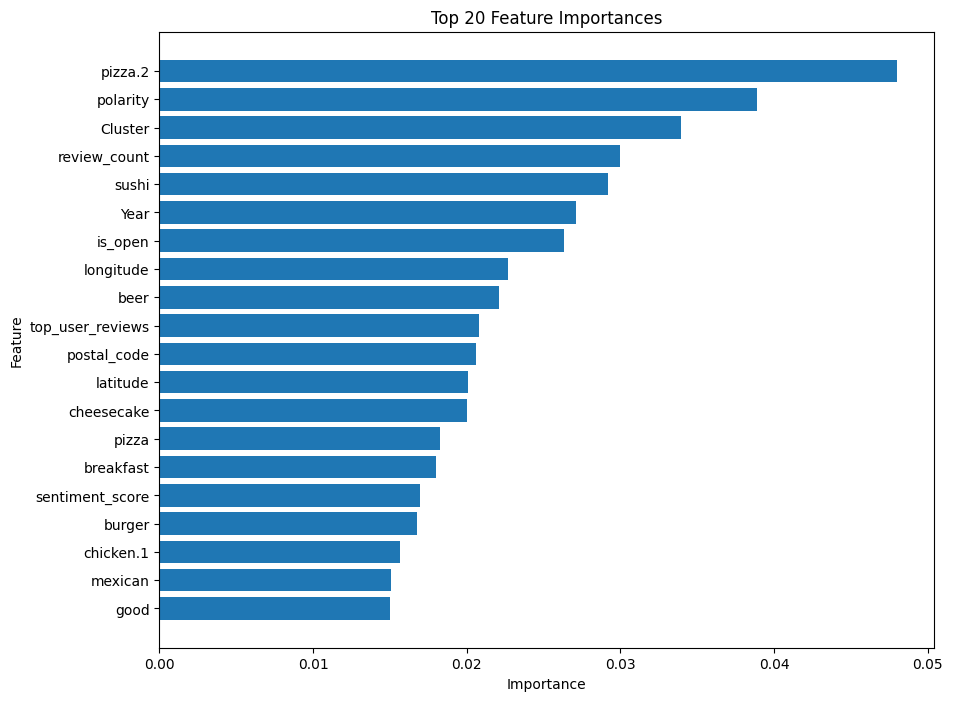

In [15]:
import matplotlib.pyplot as plt

# Extract feature importances
feature_importances = xgb_classifier.feature_importances_

# Assuming X_train is a DataFrame, get the feature names
feature_names = X_train.columns

# Create a pandas DataFrame to hold the feature names and their importance scores
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame based on the importance scores
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = importance_df.head(20)

# Plotting the top 20 features
plt.figure(figsize=(10, 8))  # Adjusted for better display of the top 20 features
plt.barh(top_20_features['Feature'], top_20_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances')
plt.gca().invert_yaxis()  # This inverts the y-axis so the most important feature is on top
plt.show()


In [16]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Example model dictionary (Add your models here)
models = {
    'XGBClassifier': XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Assuming X and y are your features and target variable respectively
# X, y = your_dataset_features, your_dataset_target

# Split your data into a training+validation set and a separate test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then split the training+validation set into individual training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42) 

# Define a range of "k" values you want to test
k_values = list(range(6, 17, 2))  # Adjust based on your dataset

# Initialize a results list to store the results
results = []

for model_name, model in models.items():
    for k in k_values:
        # Select the top k features
        selector = SelectKBest(f_classif, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        X_val_selected = selector.transform(X_val)
        X_test_selected = selector.transform(X_test)

        # Train the model and make predictions
        model.fit(X_train_selected, y_train)
        y_train_pred = model.predict(X_train_selected)
        y_val_pred = model.predict(X_val_selected)
        y_test_pred = model.predict(X_test_selected)

        # Calculate accuracies
        accuracy_train = accuracy_score(y_train, y_train_pred)
        accuracy_val = accuracy_score(y_val, y_val_pred)
        accuracy_test = accuracy_score(y_test, y_test_pred)

        # Calculate AUC scores, handling multi-class classification appropriately
        y_prob_train = model.predict_proba(X_train_selected)
        y_prob_val = model.predict_proba(X_val_selected)
        y_prob_test = model.predict_proba(X_test_selected)
        auc_train = roc_auc_score(y_train, y_prob_train, multi_class='ovr', average='weighted')
        auc_val = roc_auc_score(y_val, y_prob_val, multi_class='ovr', average='weighted')
        auc_test = roc_auc_score(y_test, y_prob_test, multi_class='ovr', average='weighted')

        # Append the results
        results.append({
            'Model': model_name,
            'K': k,
            'Train Accuracy': accuracy_train,
            'Validation Accuracy': accuracy_val,
            'Test Accuracy': accuracy_test,
            'AUC Train': auc_train,
            'AUC Validation': auc_val,
            'AUC Test': auc_test
        })

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results)

# Display the DataFrame
print(results_df)

# Identify the best performing model and number of features based on validation accuracy
best_row = results_df.loc[results_df['Validation Accuracy'].idxmax()]
print("\nBest Model and K Value Based on Validation Accuracy:")
print(best_row)


                     Model   K  Train Accuracy  Validation Accuracy  \
0            XGBClassifier   6        0.475443             0.468029   
1            XGBClassifier   8        0.511266             0.504059   
2            XGBClassifier  10        0.677153             0.673652   
3            XGBClassifier  12        0.675473             0.669852   
4            XGBClassifier  14        0.695546             0.690262   
5            XGBClassifier  16        0.690923             0.683923   
6   RandomForestClassifier   6        0.999988             0.476422   
7   RandomForestClassifier   8        0.999991             0.488747   
8   RandomForestClassifier  10        1.000000             0.805406   
9   RandomForestClassifier  12        1.000000             0.738919   
10  RandomForestClassifier  14        1.000000             0.836276   
11  RandomForestClassifier  16        1.000000             0.866676   

    Test Accuracy  AUC Train  AUC Validation  AUC Test  
0        0.465877  

#### XGboost classifier k=10 

The XGBClassifier with 10 features seems to offer a good balance with high accuracy and AUC scores across training, validation, and test sets without a big discrepancy that would suggest overfitting.

- Train Accuracy  0.677153             
- Validation Accuracy 0.673652  
- Test Accuracy  0.673631   
- AUC Train  0.900363        
- AUC Validation  0.898446  
- AUC Test 0.898044

Feature importances for the top 10 features selected by XGBoost:
Cluster: 0.2301938831806183
review_count: 0.13145548105239868
longitude: 0.11085624247789383
is_open: 0.1045035645365715
Year: 0.10437563061714172
polarity: 0.09889552742242813
pizza.2: 0.09207354485988617
sentiment_score: 0.06146477535367012
pizza: 0.035932689905166626
great: 0.03024856187403202


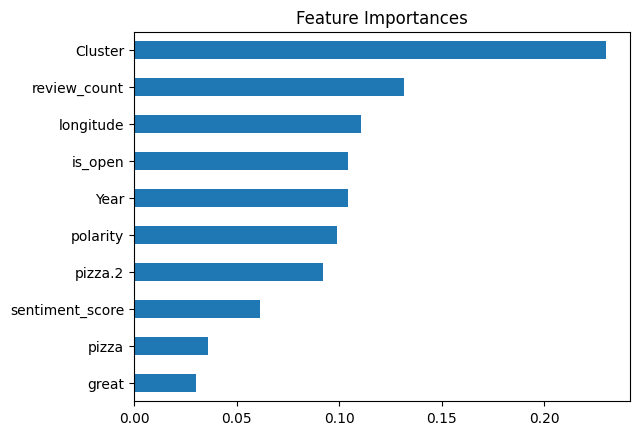

In [17]:
# Initialize the XGBClassifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Select the top 10 features
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Fit the XGBClassifier
xgb.fit(X_train_selected, y_train)

# Get feature importances and map them to the selected feature names
feature_importances = xgb.feature_importances_
selected_indices = selector.get_support(indices=True)
selected_features = [X_train.columns[i] for i in selected_indices]
feature_importances_dict = dict(zip(selected_features, feature_importances))

# Print or plot the feature importances
print("Feature importances for the top 10 features selected by XGBoost:")
for feature, importance in sorted(feature_importances_dict.items(), key=lambda item: item[1], reverse=True):
    print(f"{feature}: {importance}")

# Optionally, plot the feature importances
pd.Series(feature_importances, index=selected_features).sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

### Statistical Modeling for Reviews Prediction

In [ ]:
#!pip install statsmodels

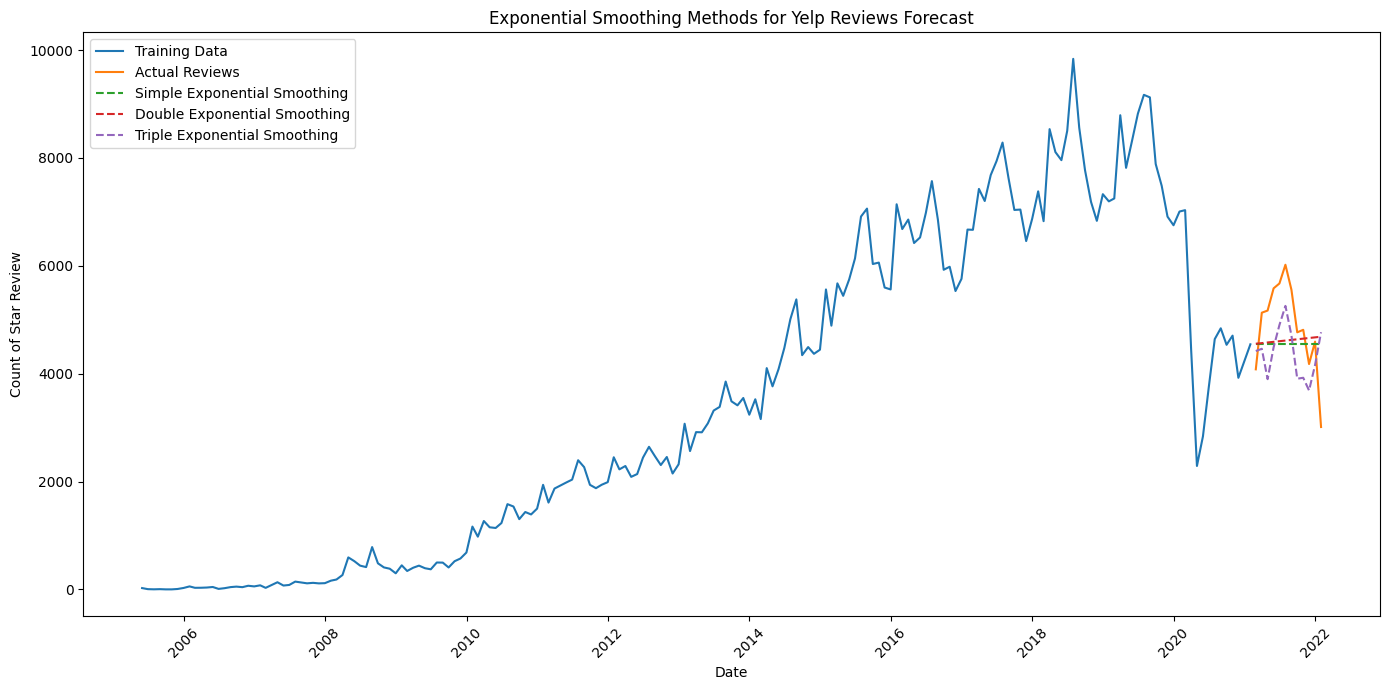

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load your data into a DataFrame (assuming it's already loaded as 'df')

# Make sure the 'date_x' column is in datetime format and set it as the index
df['date_'] = pd.to_datetime(df['date_x'])
df.set_index('date_', inplace=True)

# Resample the data monthly and take the average of the stars_review
monthly_reviews = df['stars_review'].resample('M').count()

# Splitting the dataset into training and testing sets
train = monthly_reviews.iloc[:-12]  # Training data (all data except the last 12 months)
test = monthly_reviews.iloc[-12:]   # Testing data (the last 12 months)

# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(train, trend=None, seasonal=None)

# Double Exponential Smoothing (Holt's Linear Trend Model)
model_double = ExponentialSmoothing(train, trend='add', seasonal=None)

# Triple Exponential Smoothing (Holt-Winters Seasonal Model)
# Assuming a yearly seasonality with 12 months
model_triple = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)

# Fit the models
fit_model_simple = model_simple.fit()
fit_model_double = model_double.fit()
fit_model_triple = model_triple.fit()

# Forecast the next 12 months
forecast_simple = fit_model_simple.forecast(12)
forecast_double = fit_model_double.forecast(12)
forecast_triple = fit_model_triple.forecast(12)

# Plotting the training data, actual test data, and forecasts
plt.figure(figsize=(14, 7))

# Note: 'train.index' and 'test.index' are used directly since they are the dates
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Reviews')

# Create a date range for the forecast which continues from the last date in 'test'
forecast_index = pd.date_range(start=train.index[-1], periods=len(forecast_simple)+1, freq='M')[1:]

plt.plot(forecast_index, forecast_simple, '--', label='Simple Exponential Smoothing')
plt.plot(forecast_index, forecast_double, '--', label='Double Exponential Smoothing')
plt.plot(forecast_index, forecast_triple, '--', label='Triple Exponential Smoothing')

plt.title('Exponential Smoothing Methods for Yelp Reviews Forecast')
plt.xlabel('Date')
plt.ylabel('Count of Star Review')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Observations:

Training Data Trend: There is a clear upward trend in the number of reviews over time. This suggests that over the years, the number of reviews has generally been increasing.

Actual vs. Forecast: The actual reviews show some volatility with what appears to be seasonal fluctuations. The forecasts from the three methods start after the last actual data point. Each method of exponential smoothing gives a different prediction for the future.

Simple Exponential Smoothing: The simple smoothing forecast (dashed line without markers) appears as a straight line, indicating that it does not account for the trend or seasonality. It essentially gives a constant forecast equal to the last level of the series.

Double Exponential Smoothing: This forecast (dashed line with round markers) shows an upward trend. This method accounts for the trend in the data but not for seasonality. The forecast continues the upward trend observed in the historical data.

Triple Exponential Smoothing: The triple smoothing forecast (dashed line with diamond markers) accounts for both trend and seasonality. However, the plot suggests that the seasonality component may not be capturing the seasonal pattern accurately, as the forecasted values do not seem to align with the seasonal peaks and troughs of the actual data. This could be due to incorrect seasonal period specification, an unusual last data point (possibly an outlier), or the model not being tuned correctly.

Sudden Drop in Actual Reviews: There is a noticeable drop in the number of reviews towards the end of the actual data. This could be due to external factors not accounted for in the model, like a change in market conditions, platform usage, data collection issues, or perhaps a global event impacting user behavior.

Model Fit: None of the forecasts seem to fit the last observed point, which might suggest that the point is an outlier, or there was a shift in the pattern not accounted for by the models. It might also indicate the need for model recalibration or the inclusion of additional data points to understand whether this drop is an anomaly or part of a new trend.

# Step 6: Recommendation Engine

In [2]:
import pandas as pd
import numpy as np
model1 = pd.read_csv("df_processed.csv")

In [41]:
df = df.sample(frac=0.01, random_state=1)
df['numeric_user_id'] = pd.factorize(df['user_id'])[0]
df['Business_id'] = pd.factorize(df['business_id'])[0]
df = df[df['polarity']>0]

<h2> Recommendations for existing user based on their rating preference

In [45]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# user ID we are making recommendations for
#target_user_id = 1 
target_user_id = int(input("Enter the target user ID: "))

# Split the data into reviews by the target user and other users
target_user_indices = df[df['numeric_user_id'] == target_user_id].index
other_user_indices = df[df['numeric_user_id'] != target_user_id].index

# Assuming X_reduced is a NumPy array corresponding to TF-IDF features for each row in df
user_profile = X_reduced[target_user_indices].mean(axis=0).reshape(1, -1)
other_restaurants_profiles = X_reduced[other_user_indices]

# Calculate cosine similarity between user profile and other restaurants
similarity_scores = cosine_similarity(user_profile, other_restaurants_profiles)

# Find the indices (in other_user_indices) of restaurants with the highest similarity scores
top_indices = np.argsort(similarity_scores.flatten())[::-1][:5]

# Convert these indices back to indices in the original DataFrame
top_df_indices = other_user_indices[top_indices]

# Fetch the restaurant IDs and their corresponding reviews for the recommendations
recommended_restaurant_ids = df.loc[top_df_indices, 'Business_id'].values
recommended_reviews_key = df.loc[top_df_indices, 'processed_text'].values
recommended_reviews = df.loc[top_df_indices, 'text'].values

# Combine the restaurant IDs and reviews in a DataFrame for display
recommendations = pd.DataFrame({
    'User_id': target_user_id,
    'recommended_restaurant_id': recommended_restaurant_ids,
    'review': recommended_reviews,
    'keyword': recommended_reviews_key
})

print(f"Top 5 recommendations for the user {target_user_id} based on their reviews:")
print(recommendations)

Enter the target user ID:  10


Top 5 recommendations for the user 10 based on their reviews:
   User_id  recommended_restaurant_id  \
0       10                         13   
1       10                          0   
2       10                          5   
3       10                          7   
4       10                         16   

                                              review  \
0  Stopped here for lunch in between events durin...   
1  I've heard about Jockamo for years through wor...   
2  This place is the quintessential midwest Mexic...   
3  Great drinks and knowledgeable bartenders! The...   
4  I had to wait over an hour for a takeout order...   

                                             keyword  
0  stopped lunch event stl design week checked ye...  
1  heard jockamo year word mouth crummy wtts comm...  
2  place quintessential midwest mexican restauran...  
3  great drink knowledgeable bartender remake coc...  
4  wait hour takeout order left kept saying order...  


<h2> Recommendations for a new user based on their food preference

In [51]:
# List all the keywords (assuming each TF-IDF feature is named after its corresponding keyword)
keywords = list(most_significant_terms)
print(keywords)
print("/n")

['food', 'great', 'pizza', 'pizza', 'pizza', 'beer', 'good', 'burger', 'coffee', 'great', 'taco', 'sushi', 'cream', 'taco', 'time', 'taco', 'staff', 'recommend', 'beer', 'love', 'best', 'coffee', 'chicken', 'amazing', 'love', 'amazing', 'wait', 'amazing', 'really', 'really', 'breakfast', 'delicious', 'coffee', 'delicious', 'go', 'order', 'excellent', 'sandwich', 'nice', 'get', 'cheese', 'donut', 'get', 'got', 'got', 'nice', 'like', 'fresh', 'drink', 'awesome', 'come', 'awesome', 'location', 'awesome', 'pretty', 'try', 'favorite', 'night', 'make', 'location', 'donut', 'better', 'wing', 'wing', 'nail', 'option', 'well', 'little', 'cake', 'louis', 'star', 'ordered', 'make', 'mexican', 'even', 'server', 'never', 'first', 'server', 'well', 'star', 'eat', 'wing', 'everything', 'fry', 'friend', 'fry', 'meal', 'everything', 'louis', 'flavor', 'hot', 'super', 'hot', 'area', 'fun', 'shrimp', 'special', 'store', 'new', 'came', 'went', 'tea', 'wonderful', 'going', 'shrimp', 'dinner', 'wonderful', 

In [56]:
# Display the keywords to the user and ask for input
#print("Please input one of the following keywords:", keywords)
user_input_keyword = input("Enter a keyword from above list: ")

# Check if the user input is valid
if user_input_keyword not in keywords:
    print("Invalid keyword. Please choose from the list.")
else:
    # Filter the DataFrame for restaurants with the highest TF-IDF scores for the given keyword
    # Sort the restaurants by the TF-IDF score for the user's chosen keyword in descending order
    top_restaurants = df.sort_values(by=user_input_keyword, ascending=False).head(5)
    
    # Recommend the top 5 restaurant IDs based on the keyword
    recommended_restaurant_ids = top_restaurants['Business_id']
    recommended_reviews = top_restaurants['text'].values
    print("Recommended restaurant IDs for the keyword '{}':".format(user_input_keyword))
    print(recommended_restaurant_ids.tolist())
recommendations1 = pd.DataFrame({
    'recommended_restaurant_id': recommended_restaurant_ids,
    'review': recommended_reviews
})
print(f"Top 5 recommendations for the user based on their food preference {user_input_keyword} is :")
recommendations1

Enter a keyword from above list:  burger


Recommended restaurant IDs for the keyword 'burger':
[17, 10, 7, 14, 16]
Top 5 recommendations for the user based on their food preference burger is :


,recommended_restaurant_id,review
72532,17,"Great food and drinks, atmosphere is pippin an..."
268366,10,Always get the lobster bisque...it's amazing. ...
172315,7,Great drinks and knowledgeable bartenders! The...
154506,14,From the jalapeño hush puppies and the chicken...
214180,16,I had to wait over an hour for a takeout order...
